This project aims to help banks predicting whether a borrower would default on loans (failed to repay their loans) through the use of a classification machine learning model. The classification model will make the predictions based on past data on each loan borrower.

In [1]:
# pip install --upgrade seaborn
# !pip install lightgbm
# !pip install imblearn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, recall_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

%matplotlib inline

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

## Features Description:

1. `ID` : Unique identifier for each loan record.
2. `year` : Year of loan issuance.
3. `loan_limit` : Loan limit category.
4. `Gender` : Loan applicant gender.
5. `approv_in_adv` : Indicates whether the loan has been pre-approved.
6. `loan_type` : Type of loan.
7. `loan_purpose` : Purpose of the loan.
8. `Credit_Worthiness` : The extent to which a person or company is considered suitable for receiving financial credit is often based on its reliability in repaying money in the past.
9. `open_credit` : Indicates whether the applicant has other open credits.
10. `business_or_commercial` : Whether the loan is for business or commercial.
11. `loan_amount` : Total loan amount.
12. `rate_of_interest` : Loan interest rate.
13. `Interest_rate_spread` : Interest rate differential relative to a benchmark index.
14. `Upfront_charges` : Initial charges for the loan.
15. `Neg_ammortization` : Indicates whether there is negative amortization.
16. `interest_only` : Whether the loan allows for interest-only payments.
17. `lump_sum_payment` : Indicates whether there is an option to pay in a single installment.
18. `property_value` : Value of the property associated with the loan
19. `construction_type` : Type of construction of the property
20. `occupancy_type` : Type of property occupancy.
21. `Secured_by` : Type of loan guarantee.
22. `total_units` : Number of units related to the loan.
23. `income` : Loan applicant's income.
24. `credit_type` : Type of credit check used.
25. `Credit_Score` : Applicant's credit score.
26. `co-applicant_credit_type` : Type of credit check for co-applicants
27. `age` : Age range of the applicant.
28. `submission_of_application` : Loan application submission method
29. `LTV (Loan to Value)`: Ratio of loan amount to property value
30. `Region` : Geographic region of the loan.
31. `Security_Type` : Type of loan security.
32. `Status` : Loan Status (1 loan granted, 0 not granted)
33. `dtir1 (Debt to Income Ratio)` : Debt/income ratio of the applicant.
34. `term` : Loan duration in months.

In [3]:
df_loan_default = pd.read_csv("/content/Loan_Default.csv")

In [4]:
print(df_loan_default.shape)
df_loan_default.head()

(148670, 34)


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [5]:
df_loan_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

<Axes: xlabel='Status', ylabel='Count'>

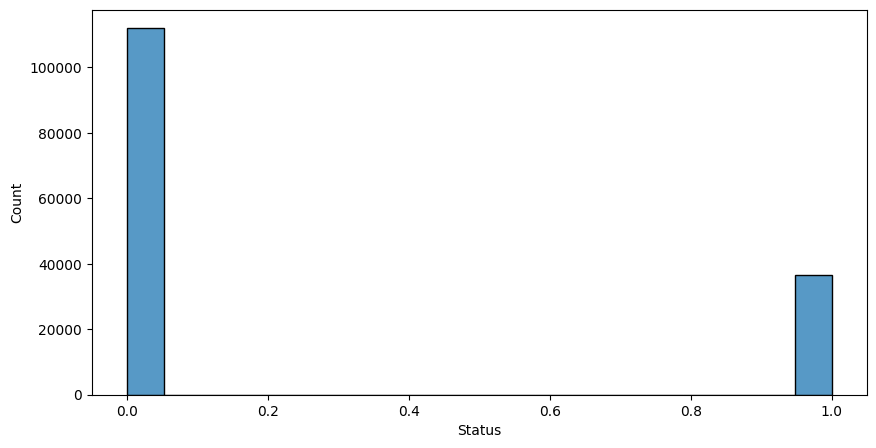

In [6]:
plt.figure(figsize = (10, 5))
sns.histplot(data = df_loan_default, x = 'Status')

The target column "Status" is imbalanced.

In [7]:
df_loan_default.duplicated(subset=["ID"]).sum()

0

There are no duplicated IDs found.

## Count and percentage of missing values of each feature

In [8]:
n_rows = df_loan_default.shape[0]

In [9]:
feat_missing_val=[col for col in df_loan_default.columns if df_loan_default[col].isna().sum()>0] #features with missing values

for feat in feat_missing_val:
    missing_val = df_loan_default[feat].isnull().sum()
    percentage = np.round((missing_val/n_rows)*100, 1)

    print(f"{feat}, {missing_val}, {percentage}%")

loan_limit, 3344, 2.2%
approv_in_adv, 908, 0.6%
loan_purpose, 134, 0.1%
rate_of_interest, 36439, 24.5%
Interest_rate_spread, 36639, 24.6%
Upfront_charges, 39642, 26.7%
term, 41, 0.0%
Neg_ammortization, 121, 0.1%
property_value, 15098, 10.2%
income, 9150, 6.2%
age, 200, 0.1%
submission_of_application, 200, 0.1%
LTV, 15098, 10.2%
dtir1, 24121, 16.2%


## Drop ID column as it does not contribute to the target

In [10]:
df_loan_default.drop(columns=["ID"], inplace=True)

In [11]:
print(df_loan_default.shape)
df_loan_default.head()

(148670, 33)


,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [12]:
df_loan_default.describe()

,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


## Grouping categorical and numerical variables

In [13]:
cats = df_loan_default.select_dtypes(include=['object']).columns
nums = df_loan_default.select_dtypes(include=['int64','float64']).columns

## Univariate Analysis

### Numerical variables

In [14]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 20, 30
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

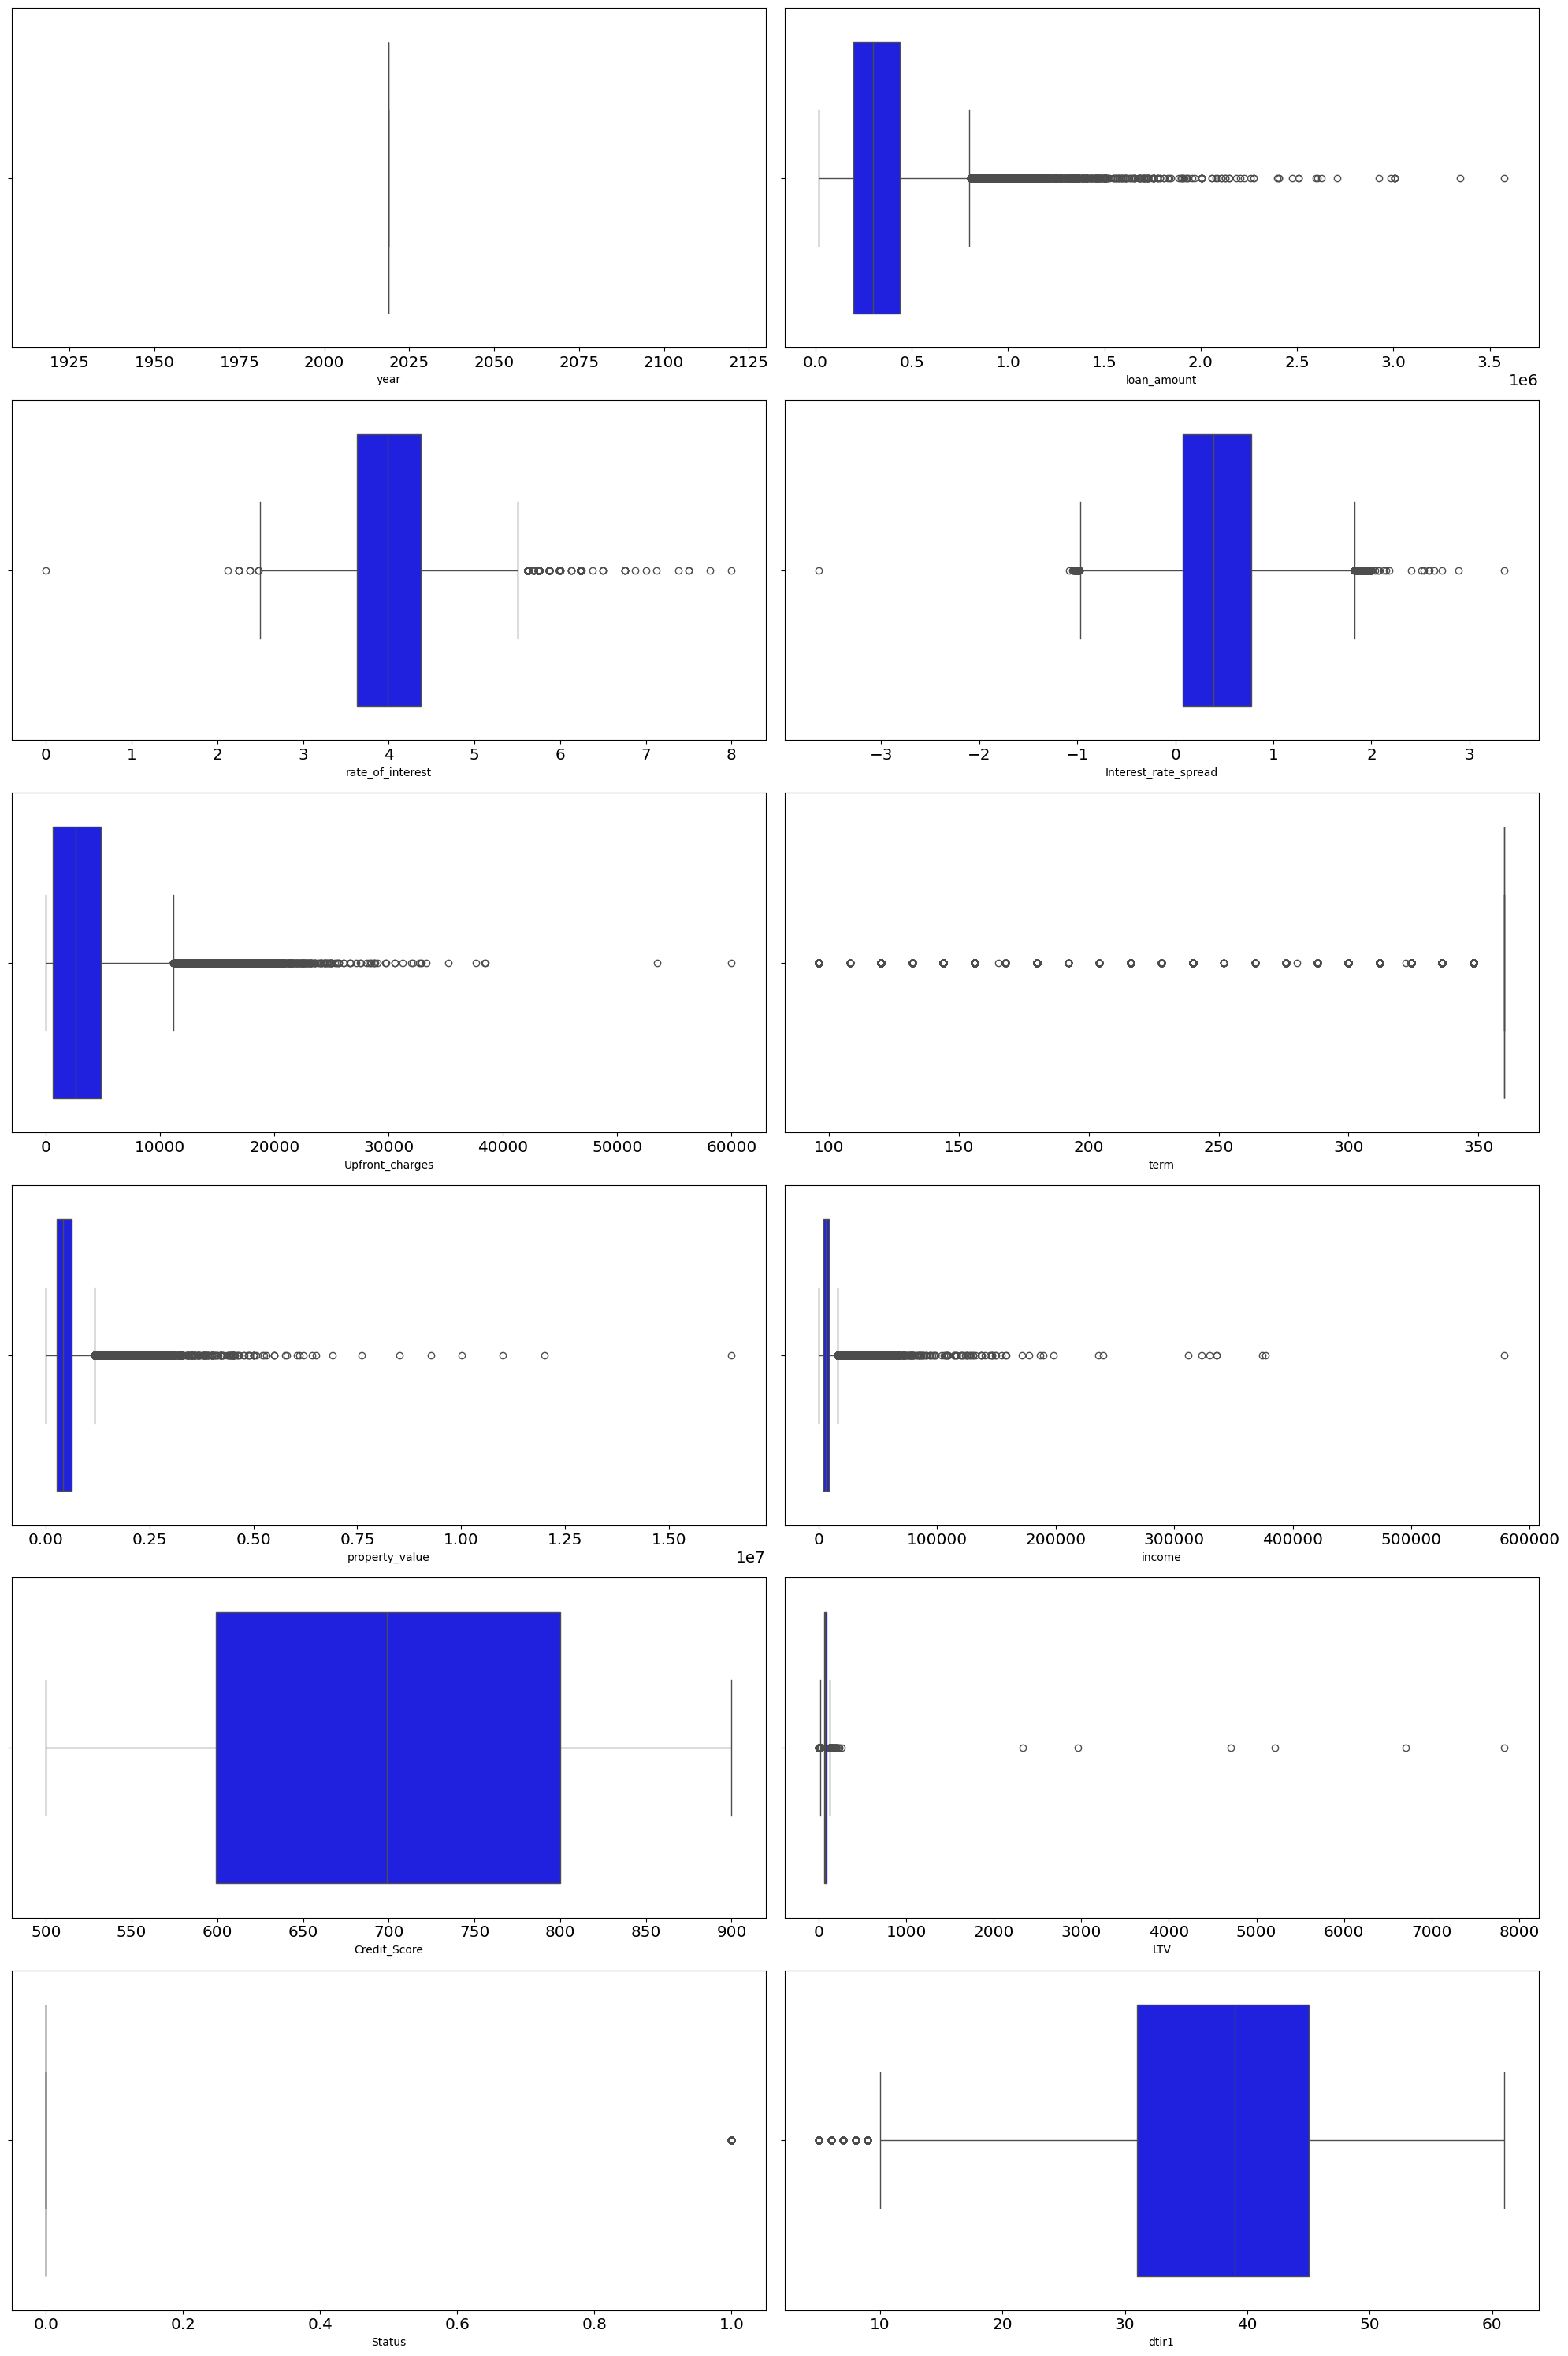

In [15]:
for i in range(0, len(nums)):
    plt.subplot(6, 2, i+1)
    sns.boxplot(x=df_loan_default[nums[i]], color='blue', orient='h')
    plt.tight_layout()

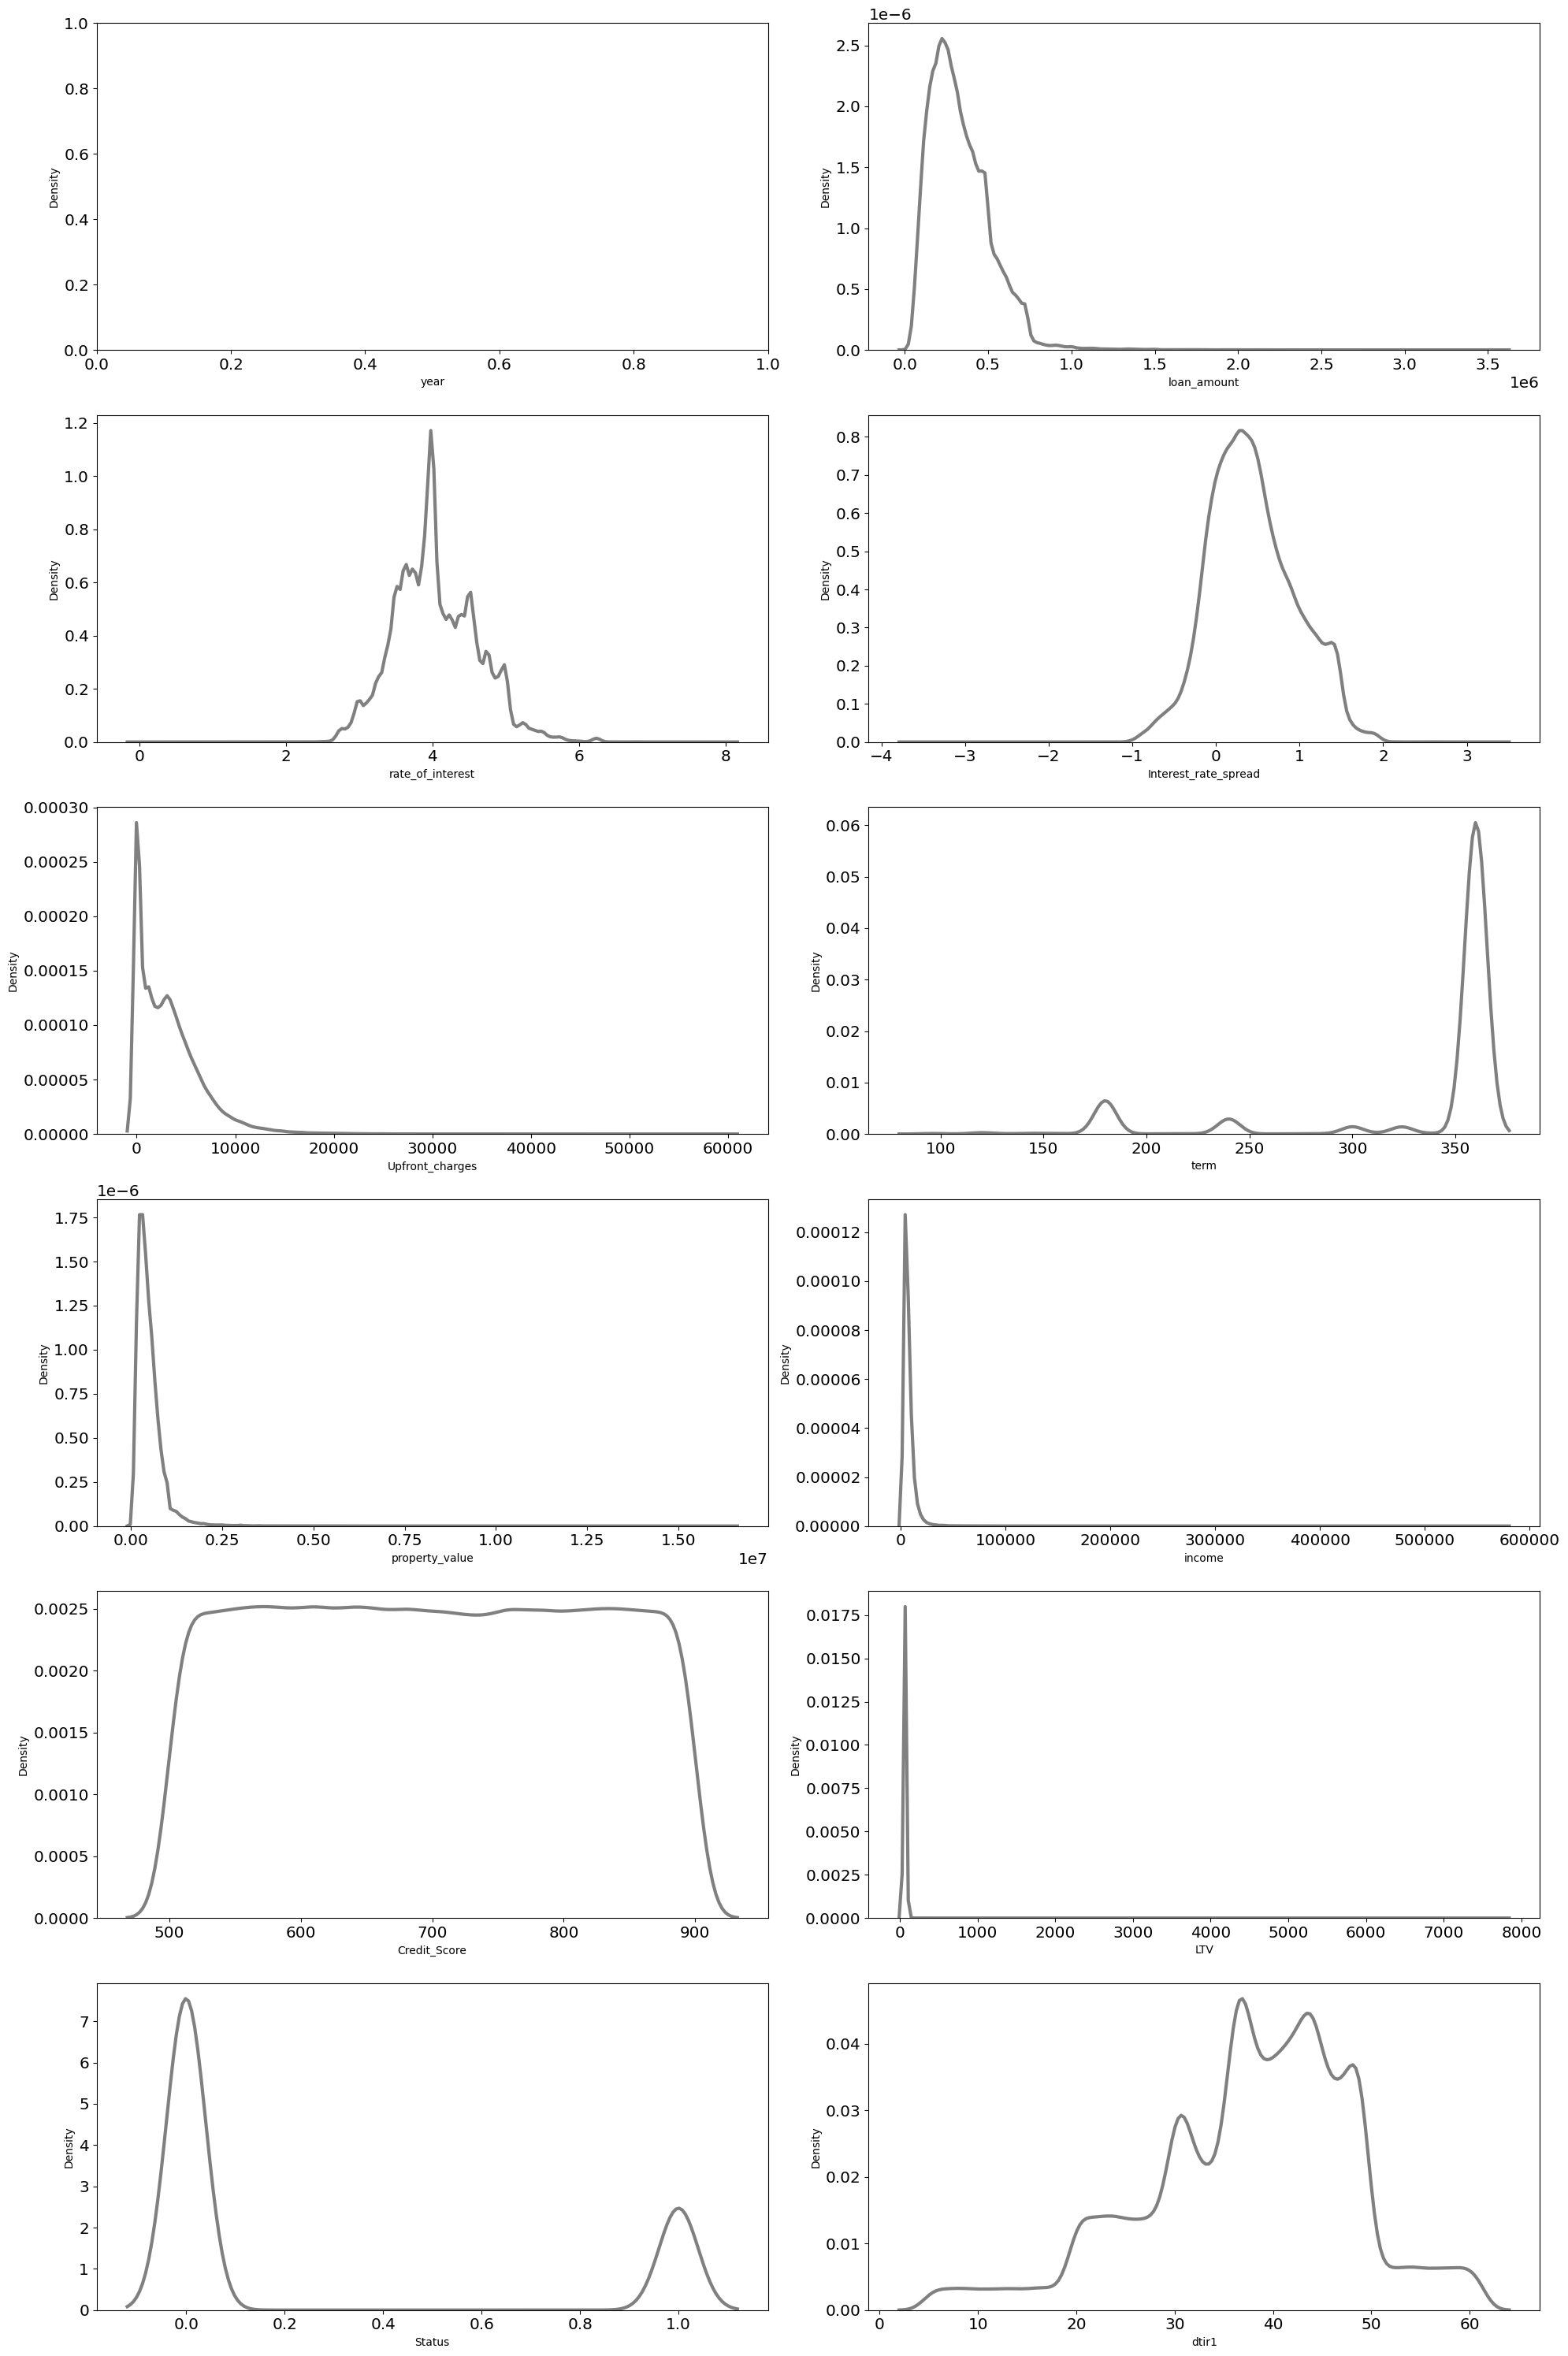

In [16]:
for i in range(0, len(nums)):
    plt.subplot(6, 2, i+1)
    sns.kdeplot(x=df_loan_default[nums[i]], color='gray')
    plt.tight_layout()

In [17]:
df_loan_default[nums].describe()

,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [18]:
def bounds(column):
    q1 = df_loan_default[column].quantile(0.25)
    q3 = df_loan_default[column].quantile(0.75)
    iqr = q3 - q1

    upper_bound = q3 + 1.5 *iqr
    lower_bound = q1 - 1.5 *iqr

    print(f"Column: {column}, lower bound: {lower_bound}, upper bound: {upper_bound}")

In [19]:
for col in nums:
    bounds(col)

Column: year, lower bound: 2019.0, upper bound: 2019.0
Column: loan_amount, lower bound: -163500.0, upper bound: 796500.0
Column: rate_of_interest, lower bound: 2.5, upper bound: 5.5
Column: Interest_rate_spread, lower bound: -0.9731000000000002, upper bound: 1.8245
Column: Upfront_charges, lower bound: -5765.025000000001, upper bound: 11159.015
Column: term, lower bound: 360.0, upper bound: 360.0
Column: property_value, lower bound: -272000.0, upper bound: 1168000.0
Column: income, lower bound: -3480.0, upper bound: 15720.0
Column: Credit_Score, lower bound: 297.5, upper bound: 1101.5
Column: LTV, lower bound: 21.910835055, upper bound: 124.748235815
Column: Status, lower bound: 0.0, upper bound: 0.0
Column: dtir1, lower bound: 10.0, upper bound: 66.0


 <b>Insights:</b>

1. loan_amount <br>
The loan_amount variable is heavily right skewed. Majority of the loan applicants applied a loan amount of between \$0 and \$796,500. Many outliers are present beyond \$796,500. <br>

2. rate_of_interest <br>
The rate_of_interest variable is about symmetrical. Majority of the applicants have an interest rate of between 3.6\% and 4.4\%. <br>

3. upfront_charges <br>
The upfront_charges variable is heavily right skewed. Most applicants receive upfront charges of between \$581 and \$4812. <br>

4. property_value <br>
The property value variable is heavily right skewed. 75\% of the applicants have property value between \$8,000 and \$628,000 and there are many outliers present in this variable which are beyond \$1,168,000. <br>

5. income <br>
75% of the total applicants have an income between \$0 and \$8520. Those applicants with income beyond \$15,720 are outliers.<br>

6. credit_score <br>
The credit_score variable is about uniform from a minimum score of 500 to a maximum score of 900. This means that there is roughly the same number of people for each credit score.<br>

7. LTV <br>
The LTV variable stands for loan to value and this represents the ratio of the loan amount to the property value. This variable is heavily right skewed as reflected by its comprising variables (loan amount and property value).<br>

8. dtir1 <br>
The dtir1 variable represents the debt to income ratio of an applicant and it has multiple peaks (multimodal). 50\% of the total applicants have a debt to income ratio of between 31 and 45.<br>

### Categorical variables

In [20]:
df_loan_default[cats].describe()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
count,145326,148670,147762,148670,148536,148670,148670,148670,148549,148670,148670,148670,148670,148670,148670,148670,148670,148470,148470,148670,148670
unique,2,4,2,3,4,2,2,2,2,2,2,2,3,2,4,4,2,7,2,4,2
top,cf,Male,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,CIB,CIB,45-54,to_inst,North,direct
freq,135348,42346,124621,113173,55934,142344,148114,127908,133420,141560,145286,148637,138201,148637,146480,48152,74392,34720,95814,74722,148637


In [21]:
df_loan_default[cats].shape

(148670, 21)

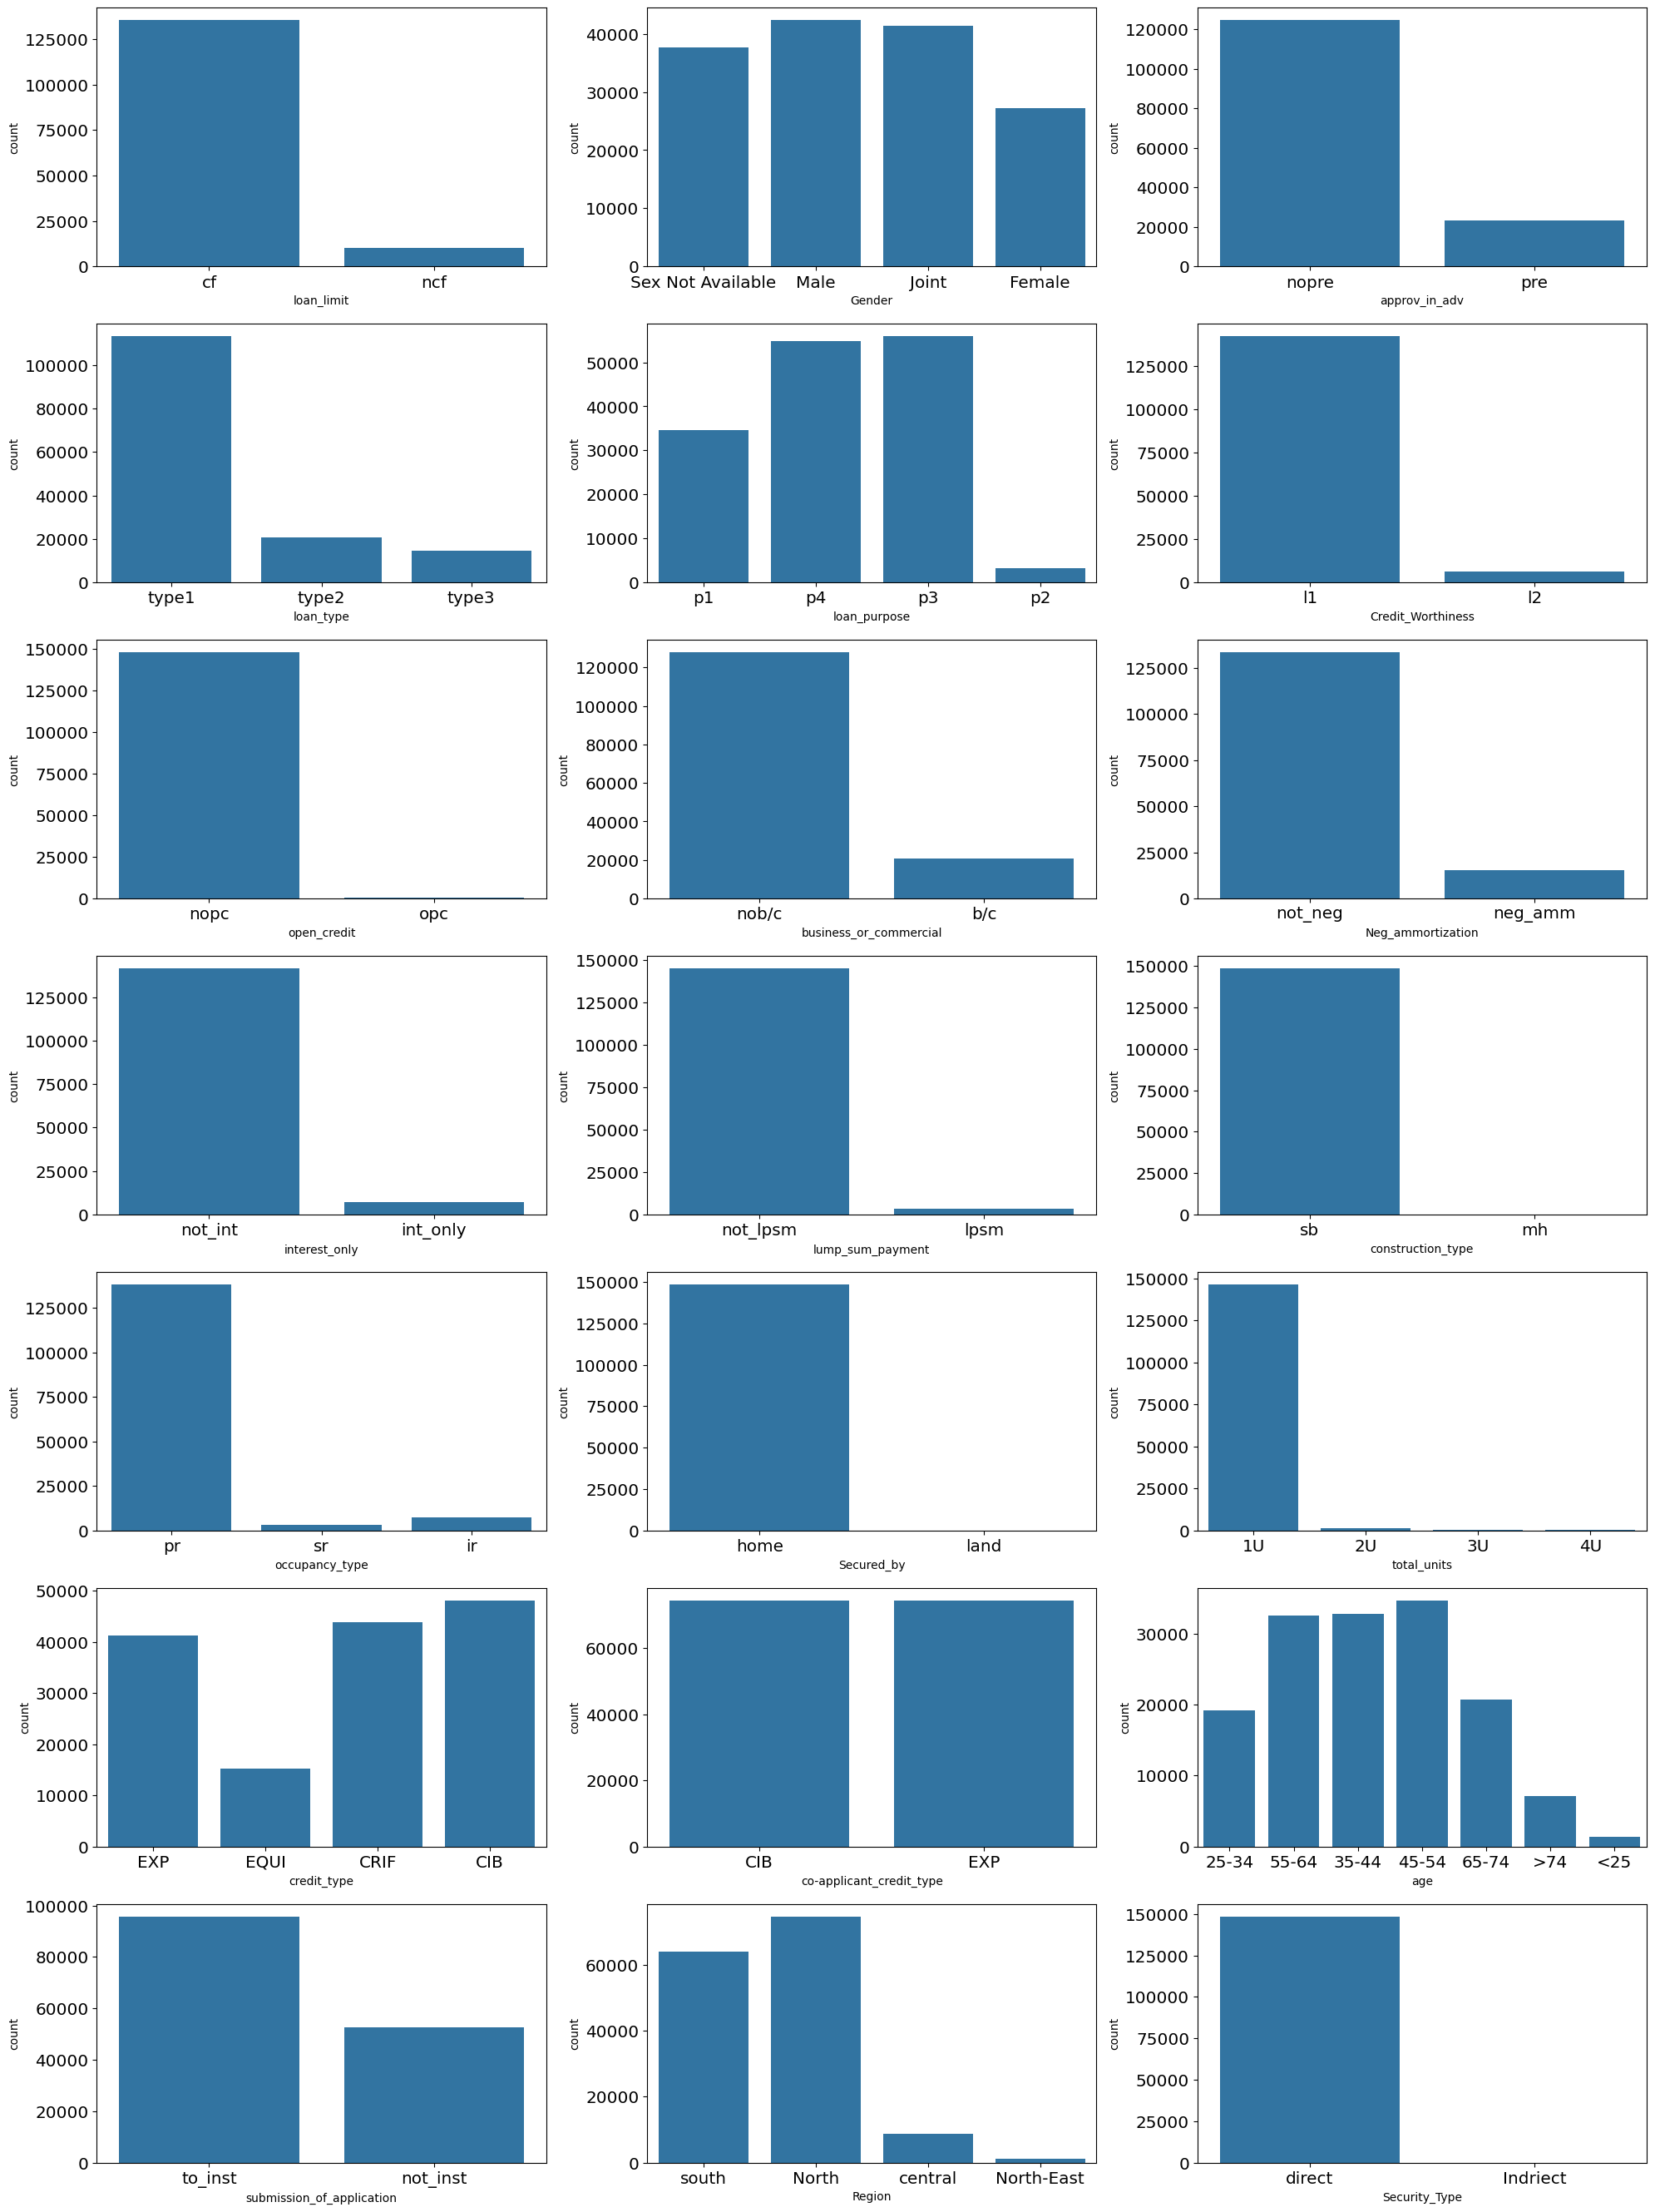

In [22]:
for i in range(0, len(cats)):
    plt.subplot(8, 3, i+1)
    sns.countplot(x=df_loan_default[cats[i]], orient='v')
    plt.tight_layout()

## Multivariate Analysis

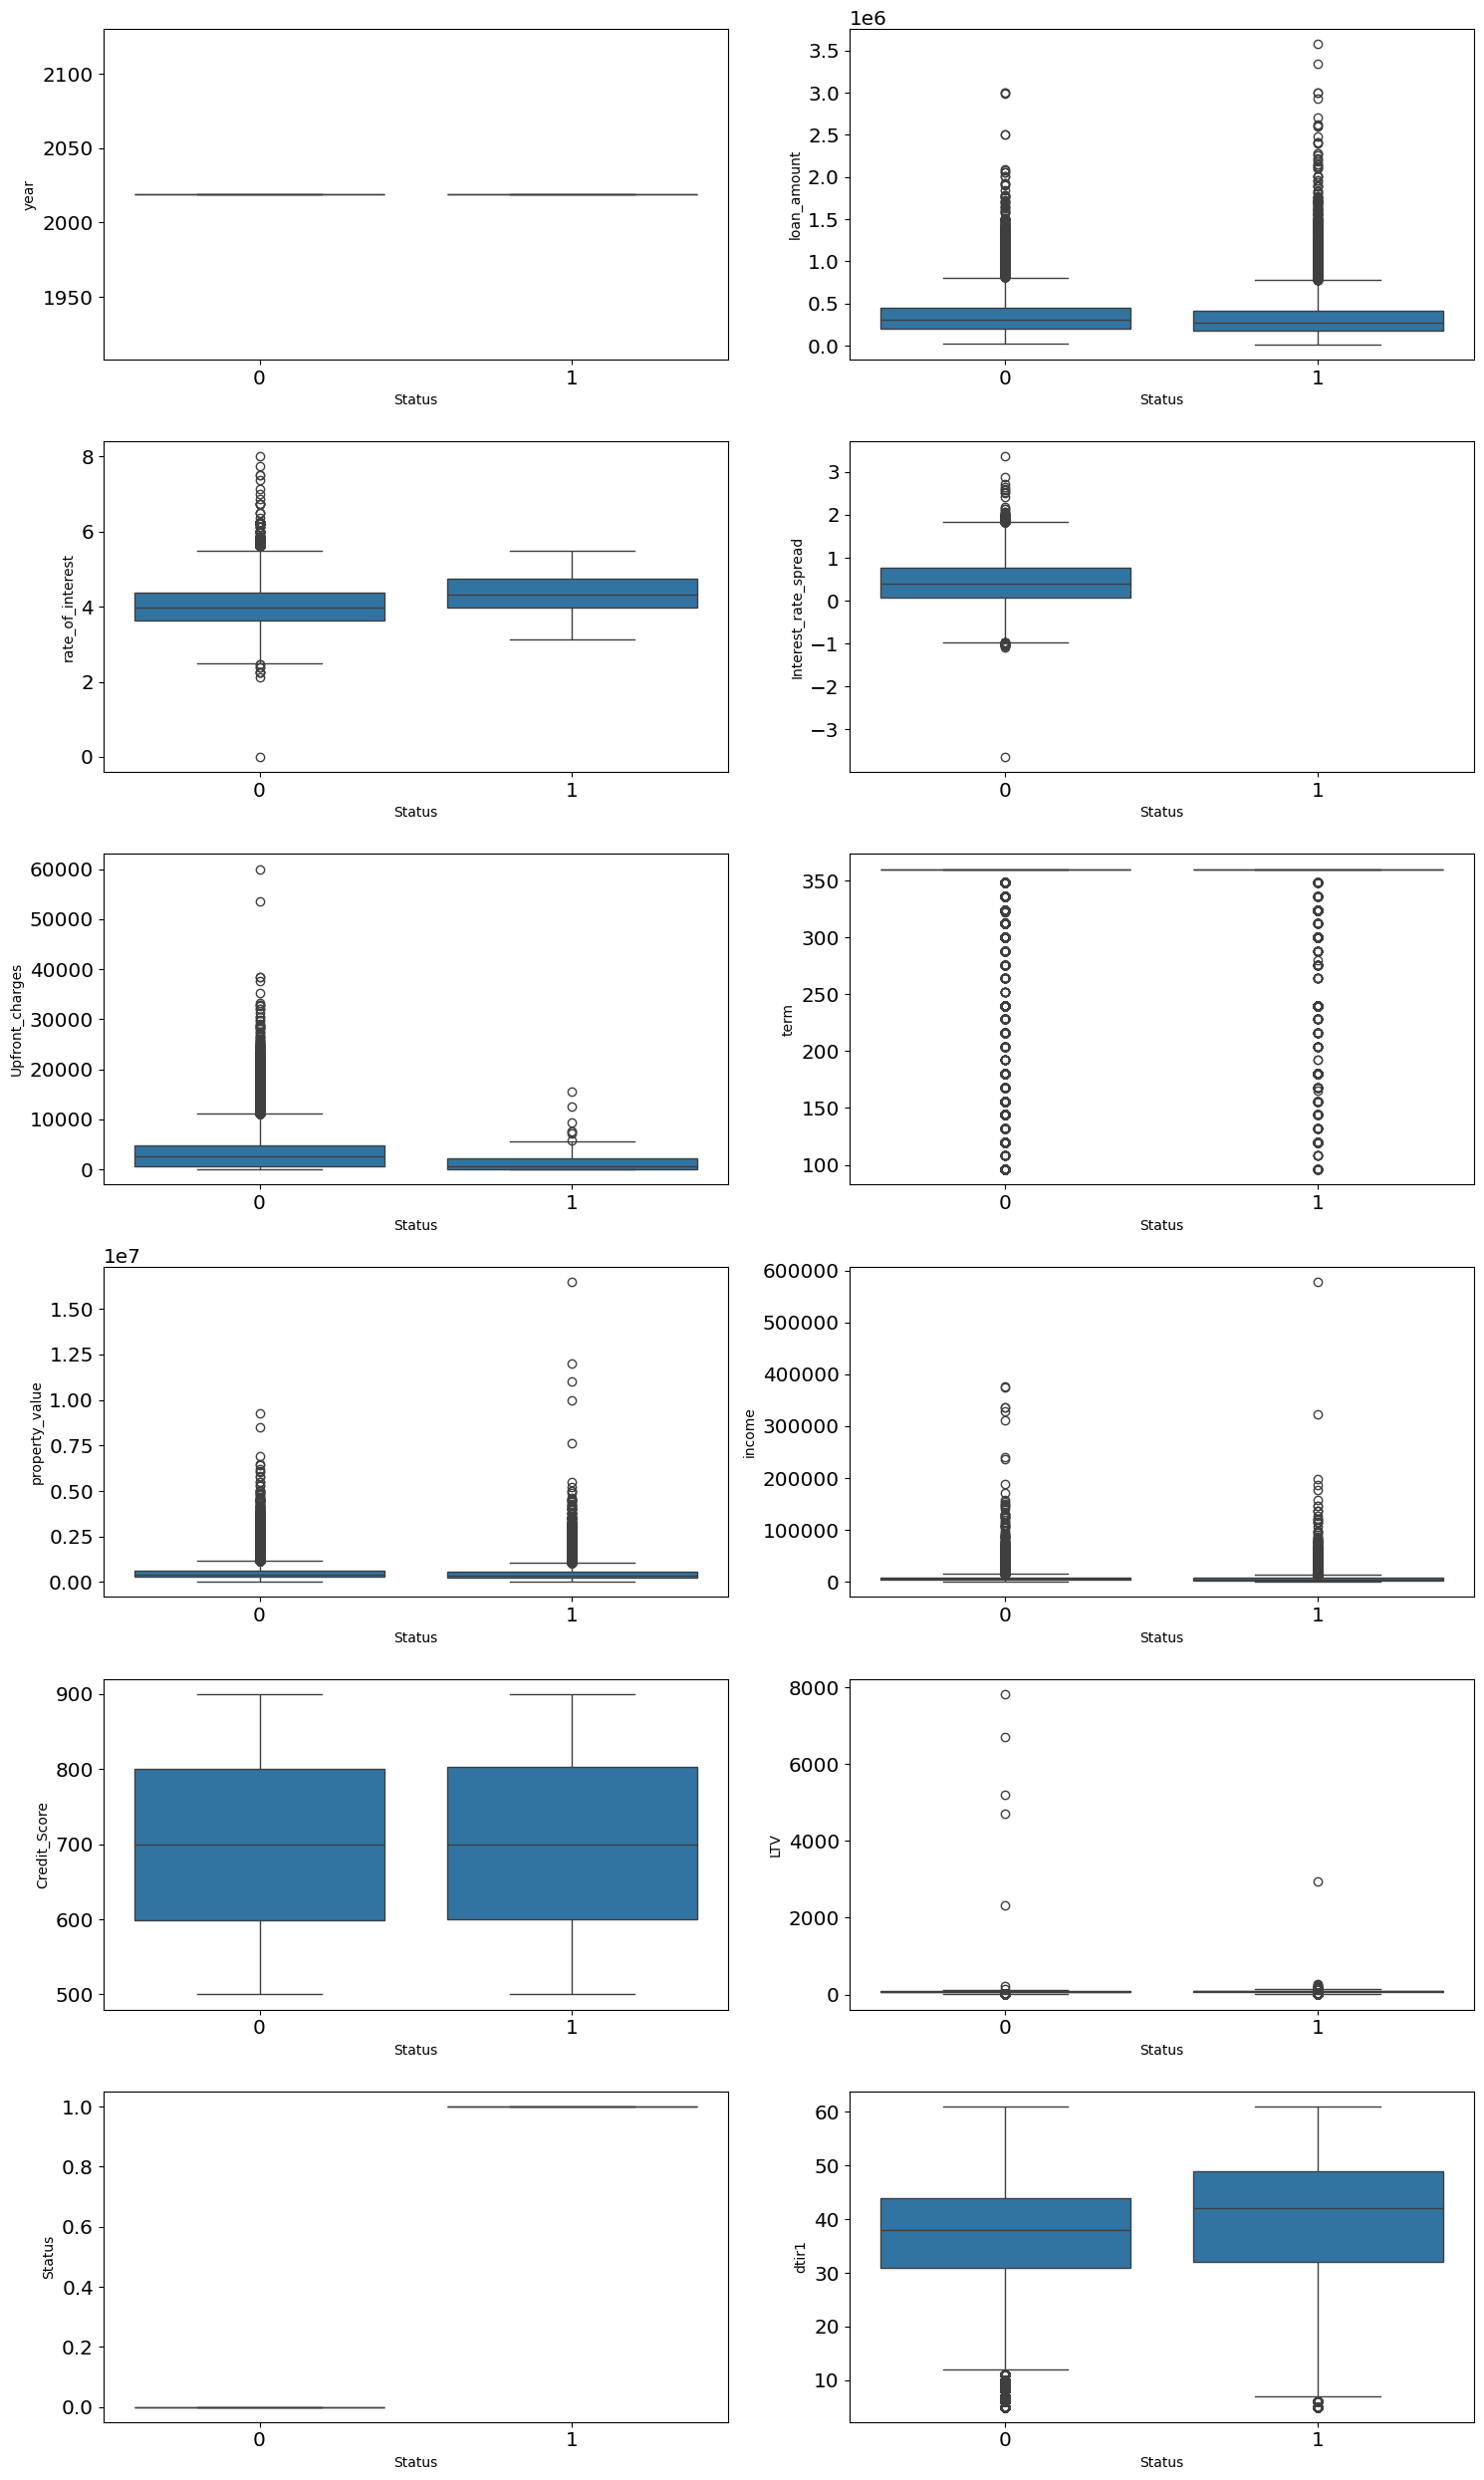

In [23]:
plt.figure(figsize=(15,25))
for i in range(0, len(nums)):
    plt.subplot(6, 2, i+1)
    sns.boxplot(data = df_loan_default, x = "Status", y = nums[i], orient='v')
    plt.tight_layout()

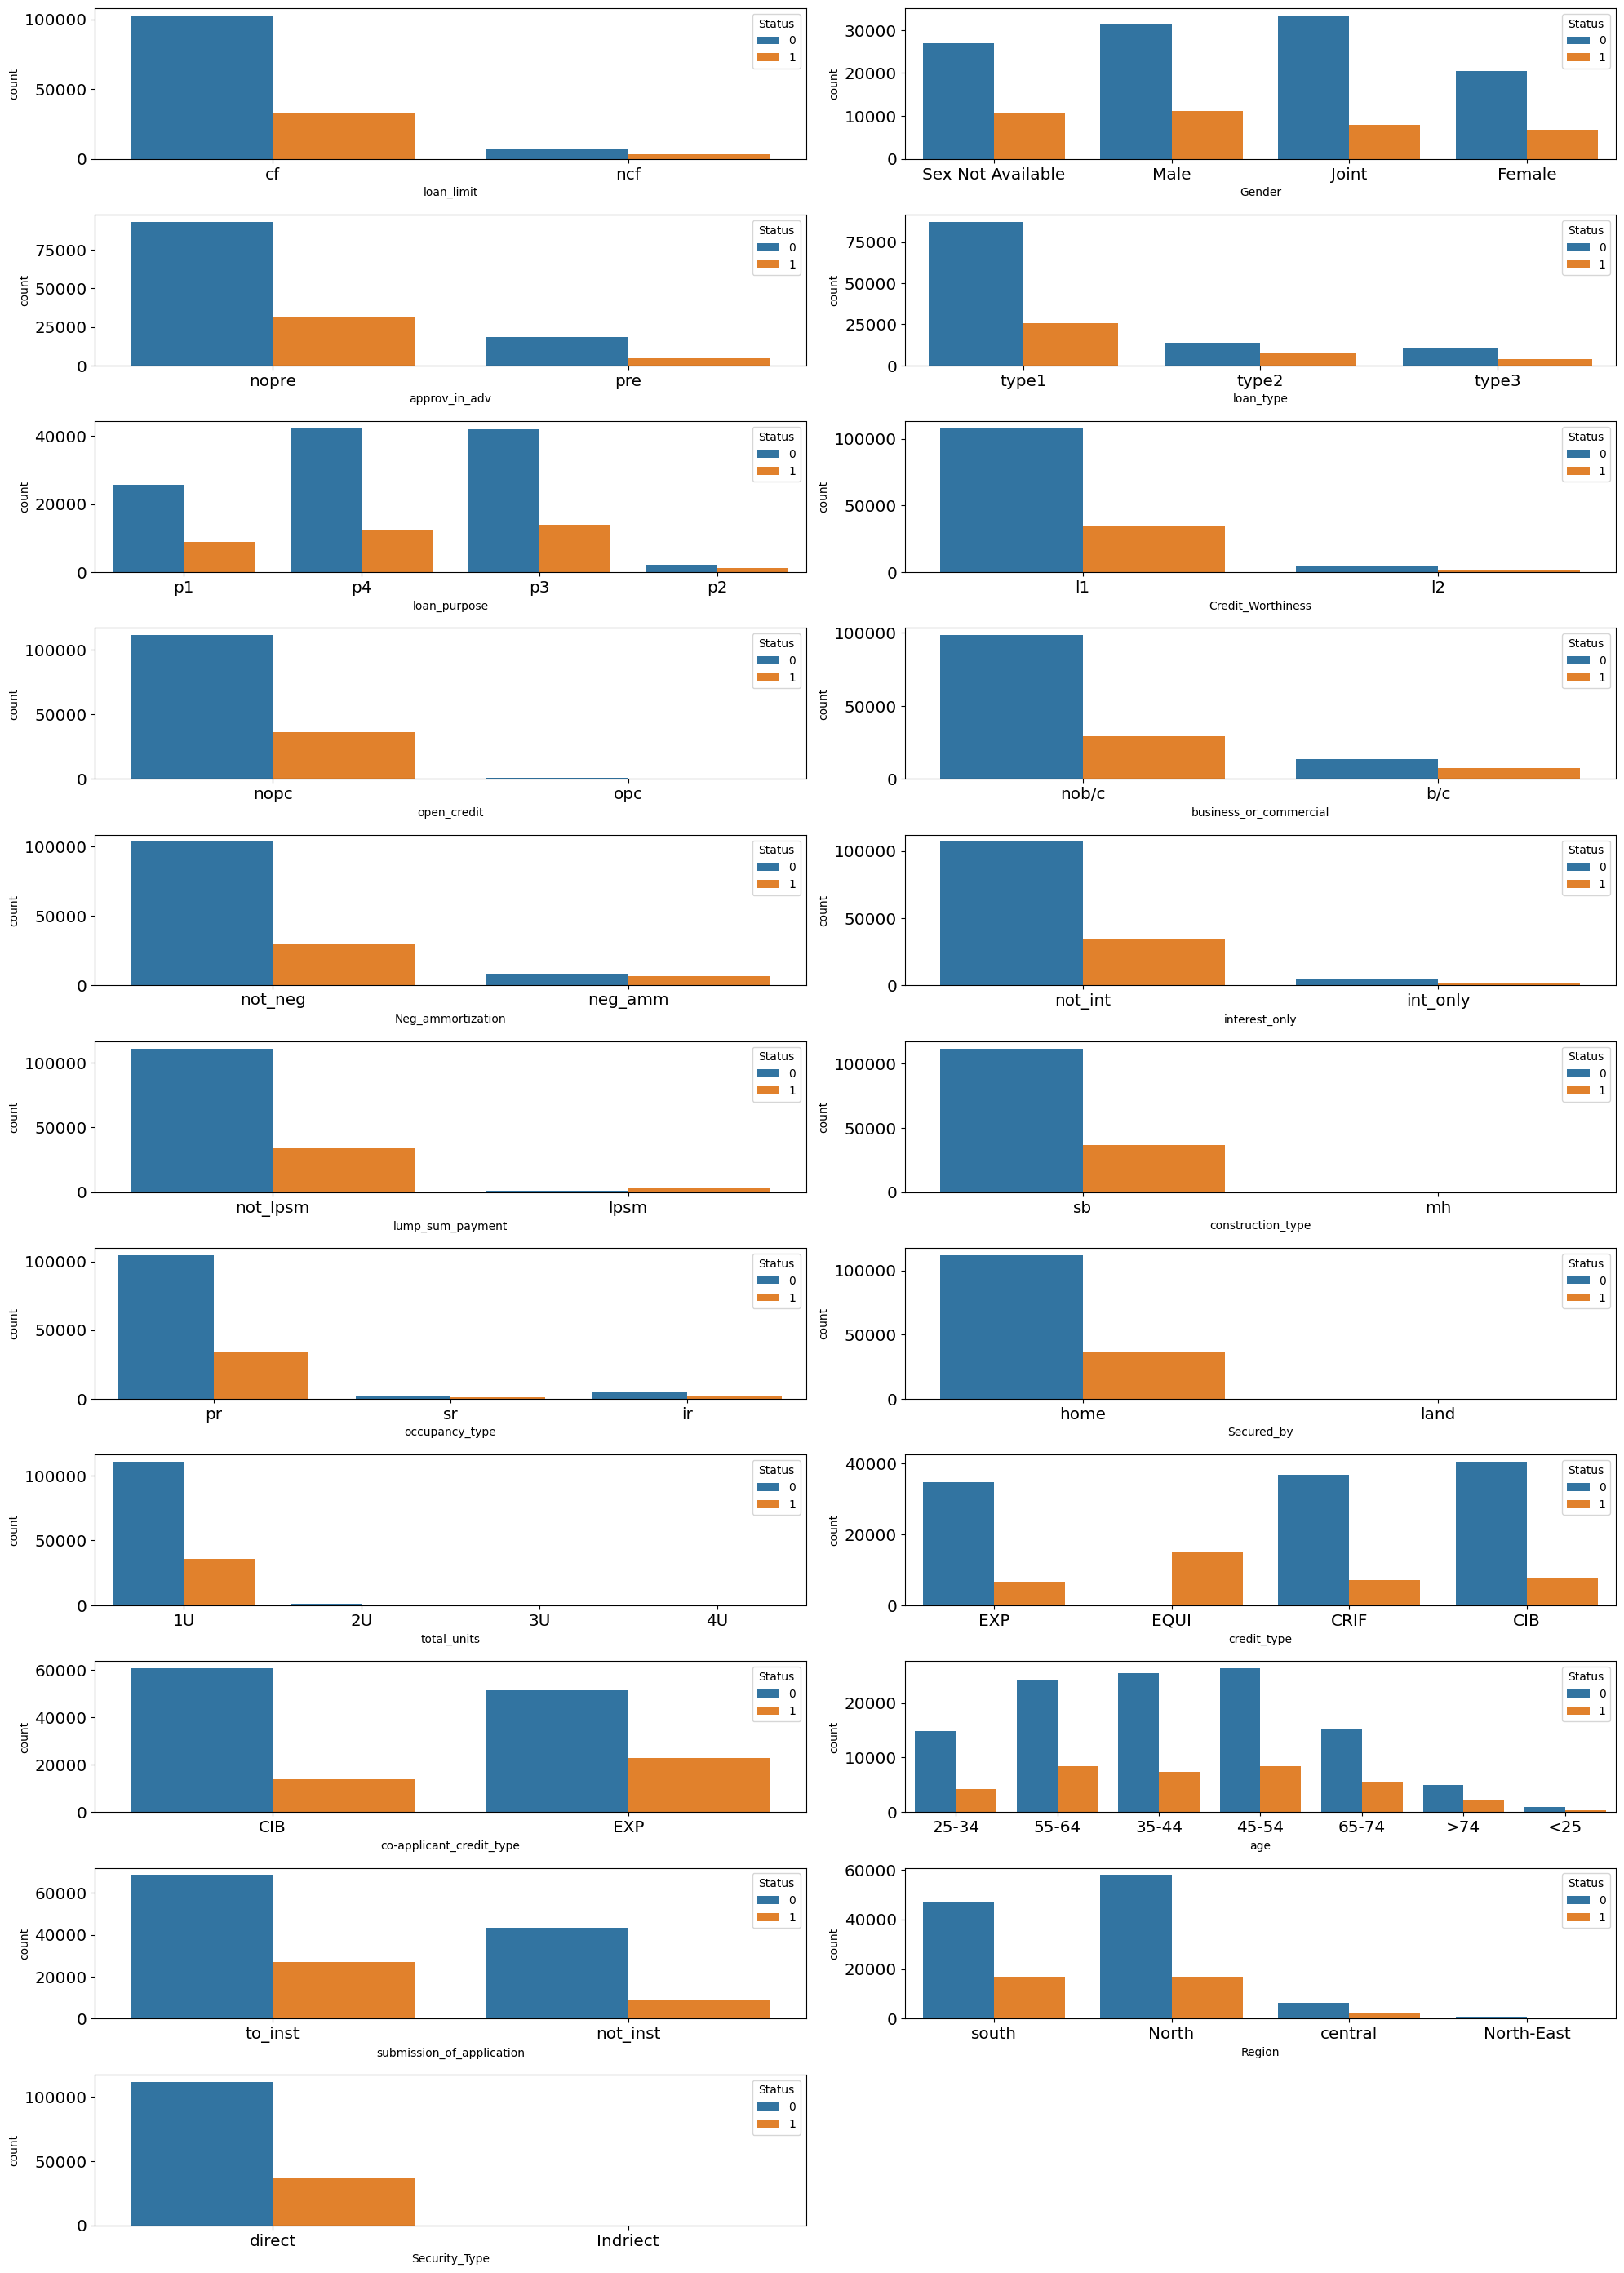

In [24]:
plt.figure(figsize=(20, 30))

for i in range(0, len(cats)):
    plt.subplot(12, 2, i+1)
    sns.countplot(data = df_loan_default, x=cats[i], hue="Status")
    plt.tight_layout()

In [25]:
correlation = df_loan_default[nums].corr()

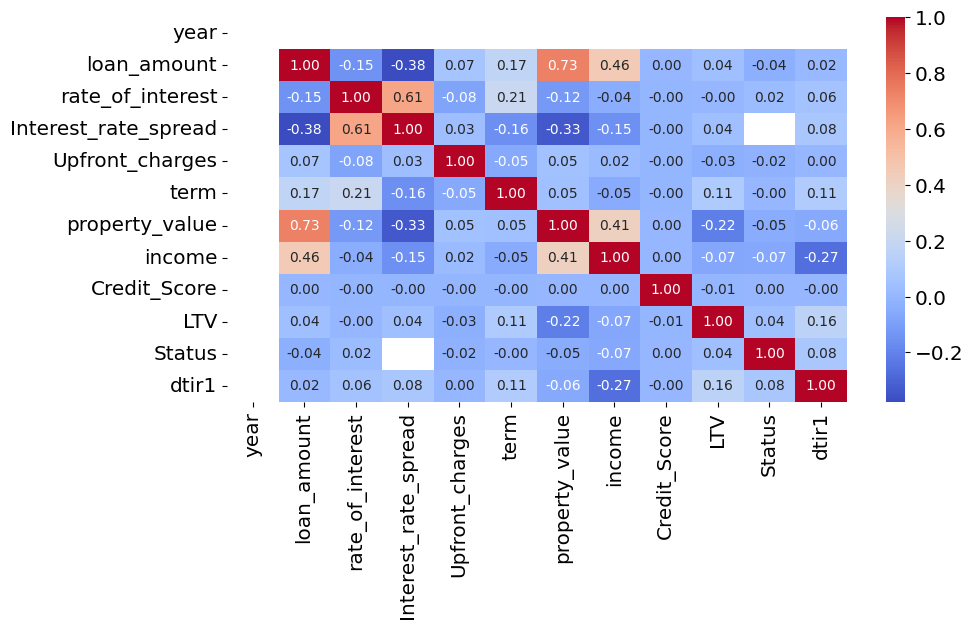

In [26]:
plt.figure(figsize=(10, 5))
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

In [27]:
sorted_corr = df_loan_default[nums].corr()["Status"].sort_values(ascending = False)

In [28]:
print('Most Postive Correlations with target variable:\n', sorted_corr.head(6))
print('\nMost Negative Correlations with target variable:\n', sorted_corr.tail())

Most Postive Correlations with target variable:
 Status              1.000000
dtir1               0.078083
LTV                 0.038895
rate_of_interest    0.022957
Credit_Score        0.004004
term               -0.000240
Name: Status, dtype: float64

Most Negative Correlations with target variable:
 loan_amount            -0.036825
property_value         -0.048864
income                 -0.065119
year                         NaN
Interest_rate_spread         NaN
Name: Status, dtype: float64


In [29]:
df_loan_default.drop(columns=["year"], inplace= True)

In [30]:
df_loan_default.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


## Splitting dataset into training and testing data

In [31]:
X = df_loan_default.drop(columns = ["Status"])
y = df_loan_default["Status"]

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Imputing missing values

In [33]:
feat_nums = nums

In [34]:
feat_nums = feat_nums.drop(["year", "Status"])

In [35]:
feat_nums

Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'dtir1'],
      dtype='object')

In [36]:
for num in feat_nums:
  X_train[num].fillna(X_train[num].median(), inplace = True)
  X_test[num].fillna(X_train[num].median(), inplace = True)

for cat in cats:
  X_train[cat].fillna(X_train[cat].mode()[0], inplace = True)
  X_test[cat].fillna(X_train[cat].mode()[0], inplace = True)

In [37]:
X_train.isnull().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
dtir1                        0
dtype: int64

In [38]:
X_test.isnull().any()

loan_limit                   False
Gender                       False
approv_in_adv                False
loan_type                    False
loan_purpose                 False
Credit_Worthiness            False
open_credit                  False
business_or_commercial       False
loan_amount                  False
rate_of_interest             False
Interest_rate_spread         False
Upfront_charges              False
term                         False
Neg_ammortization            False
interest_only                False
lump_sum_payment             False
property_value               False
construction_type            False
occupancy_type               False
Secured_by                   False
total_units                  False
income                       False
credit_type                  False
Credit_Score                 False
co-applicant_credit_type     False
age                          False
submission_of_application    False
LTV                          False
Region              

## Encoding features

In [39]:
for cat in cats:
  if X_train[cat].nunique() == 2:
    le = LabelEncoder()
    le.fit(X_train[cat])
    X_train[cat] = le.transform(X_train[cat])
    X_test[cat] = le.transform(X_test[cat])

In [40]:
one_hot_cats = []

for cat in cats:
    if X_train[cat].nunique() > 2:
        one_hot_cats.append(cat)

In [41]:
one_hot_cats

['Gender',
 'loan_type',
 'loan_purpose',
 'occupancy_type',
 'total_units',
 'credit_type',
 'age',
 'Region']

In [42]:
X_train = pd.get_dummies(data = X_train, columns = one_hot_cats, drop_first = True, dtype = float)
X_test = pd.get_dummies(data = X_test, columns = one_hot_cats, drop_first = True, dtype = float)

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104069 entries, 74299 to 128037
Data columns (total 48 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 104069 non-null  int64  
 1   approv_in_adv              104069 non-null  int64  
 2   Credit_Worthiness          104069 non-null  int64  
 3   open_credit                104069 non-null  int64  
 4   business_or_commercial     104069 non-null  int64  
 5   loan_amount                104069 non-null  int64  
 6   rate_of_interest           104069 non-null  float64
 7   Interest_rate_spread       104069 non-null  float64
 8   Upfront_charges            104069 non-null  float64
 9   term                       104069 non-null  float64
 10  Neg_ammortization          104069 non-null  int64  
 11  interest_only              104069 non-null  int64  
 12  lump_sum_payment           104069 non-null  int64  
 13  property_value           

In [44]:
X_train.head()

,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,Secured_by,income,Credit_Score,co-applicant_credit_type,submission_of_application,LTV,Security_Type,dtir1,Gender_Joint,Gender_Male,Gender_Sex Not Available,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,occupancy_type_pr,occupancy_type_sr,total_units_2U,total_units_3U,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,Region_North-East,Region_central,Region_south
74299,1,0,0,0,1,226500,3.990,0.3902,2588.855,360.0,1,1,1,308000.0,1,0,7320.0,835,1,0,73.538961,1,55.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
132142,0,0,0,0,1,126500,4.875,1.0668,1250.000,360.0,0,1,1,148000.0,1,0,2820.0,698,0,1,85.472973,1,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
131143,0,0,0,0,1,226500,3.990,0.3902,2588.855,360.0,1,1,1,258000.0,1,0,2220.0,516,0,1,87.790698,1,46.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
126016,0,0,0,0,0,246500,3.750,1.1768,6339.670,360.0,1,1,1,308000.0,1,0,9960.0,503,1,1,80.032468,1,16.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
72434,0,0,0,0,1,326500,3.990,0.8019,4451.500,360.0,1,1,1,338000.0,1,0,6060.0,664,0,1,96.597633,1,32.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44601 entries, 30000 to 136044
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_limit                 44601 non-null  int64  
 1   approv_in_adv              44601 non-null  int64  
 2   Credit_Worthiness          44601 non-null  int64  
 3   open_credit                44601 non-null  int64  
 4   business_or_commercial     44601 non-null  int64  
 5   loan_amount                44601 non-null  int64  
 6   rate_of_interest           44601 non-null  float64
 7   Interest_rate_spread       44601 non-null  float64
 8   Upfront_charges            44601 non-null  float64
 9   term                       44601 non-null  float64
 10  Neg_ammortization          44601 non-null  int64  
 11  interest_only              44601 non-null  int64  
 12  lump_sum_payment           44601 non-null  int64  
 13  property_value             44601 non-null

In [46]:
X_test.head()

,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,Secured_by,income,Credit_Score,co-applicant_credit_type,submission_of_application,LTV,Security_Type,dtir1,Gender_Joint,Gender_Male,Gender_Sex Not Available,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,occupancy_type_pr,occupancy_type_sr,total_units_2U,total_units_3U,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,Region_North-East,Region_central,Region_south
30000,0,1,0,0,1,426500,4.50,0.0222,0.00,360.0,1,1,1,418000.0,1,0,5580.0,890,0,1,102.033493,1,58.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36531,0,1,0,0,0,226500,3.75,1.2861,6736.18,360.0,1,1,1,238000.0,1,0,3540.0,794,1,1,95.168067,1,57.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22626,0,0,0,0,1,446500,3.25,-0.3707,2797.00,360.0,1,1,1,838000.0,1,0,7740.0,749,1,1,53.281623,1,37.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
10122,1,0,0,0,1,1186500,3.25,-0.1211,1250.00,360.0,1,1,1,3848000.0,1,0,52440.0,745,0,1,30.834200,1,26.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
16926,0,0,0,0,1,366500,4.00,0.1271,1591.51,360.0,1,1,1,388000.0,1,0,4800.0,689,1,0,94.458763,1,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Remove outliers

In [47]:
training_data = pd.concat([X_train, y_train], axis = 1)

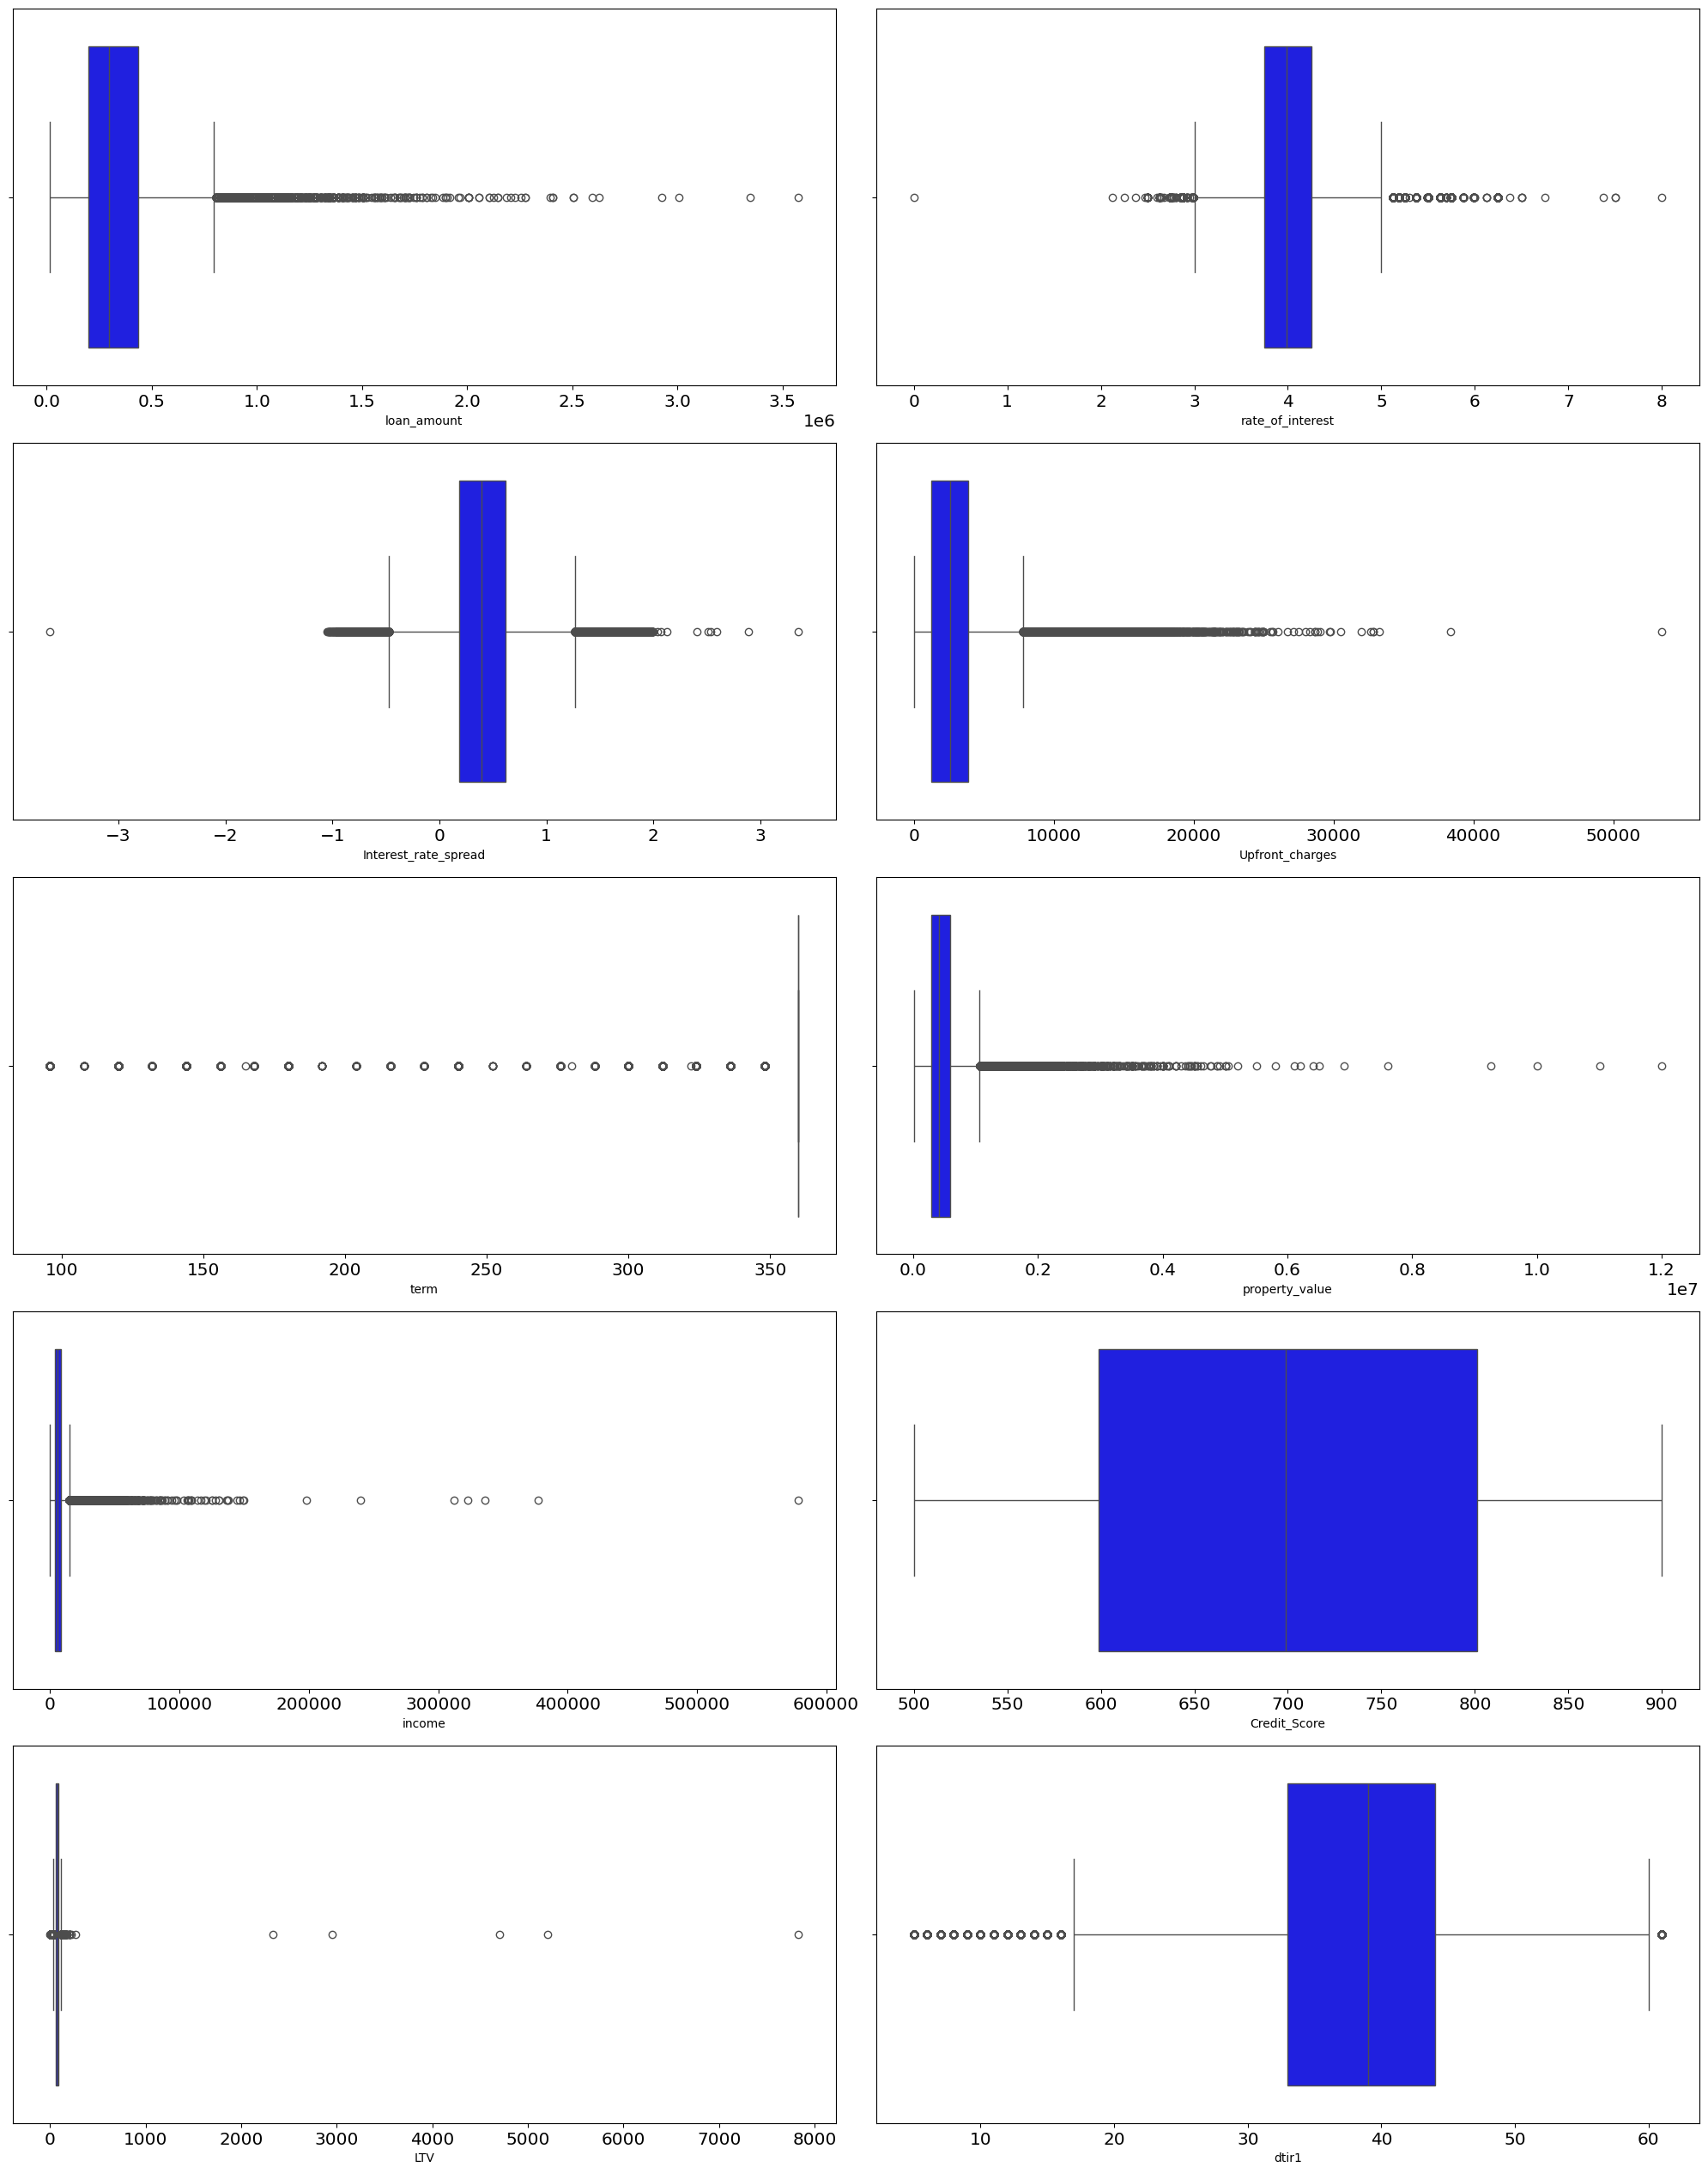

In [48]:
for i in range(0, len(feat_nums)):
    plt.subplot(6, 2, i+1)
    sns.boxplot(x=training_data[feat_nums[i]], color='blue', orient='h')
    plt.tight_layout()

In [49]:
def remove_outliers(dataframe, column_name):
    # Calculate the IQR
    q1 = dataframe[column_name].quantile(0.25)
    q3 = dataframe[column_name].quantile(0.75)
    iqr = q3-q1

    # Define lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter the DataFrame to exclude outliers
    filtered_dataframe = dataframe[(dataframe[column_name] >= lower_bound) & (dataframe[column_name] <= upper_bound)]

    return filtered_dataframe

In [50]:
filtered_df = training_data.copy()

In [51]:
cols = feat_nums
cols = cols.drop(["Credit_Score"])

In [52]:
cols

Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'LTV', 'dtir1'],
      dtype='object')

In [53]:
for col in cols:
     filtered_df = remove_outliers(filtered_df, col)

filtered_df.shape

(56085, 49)

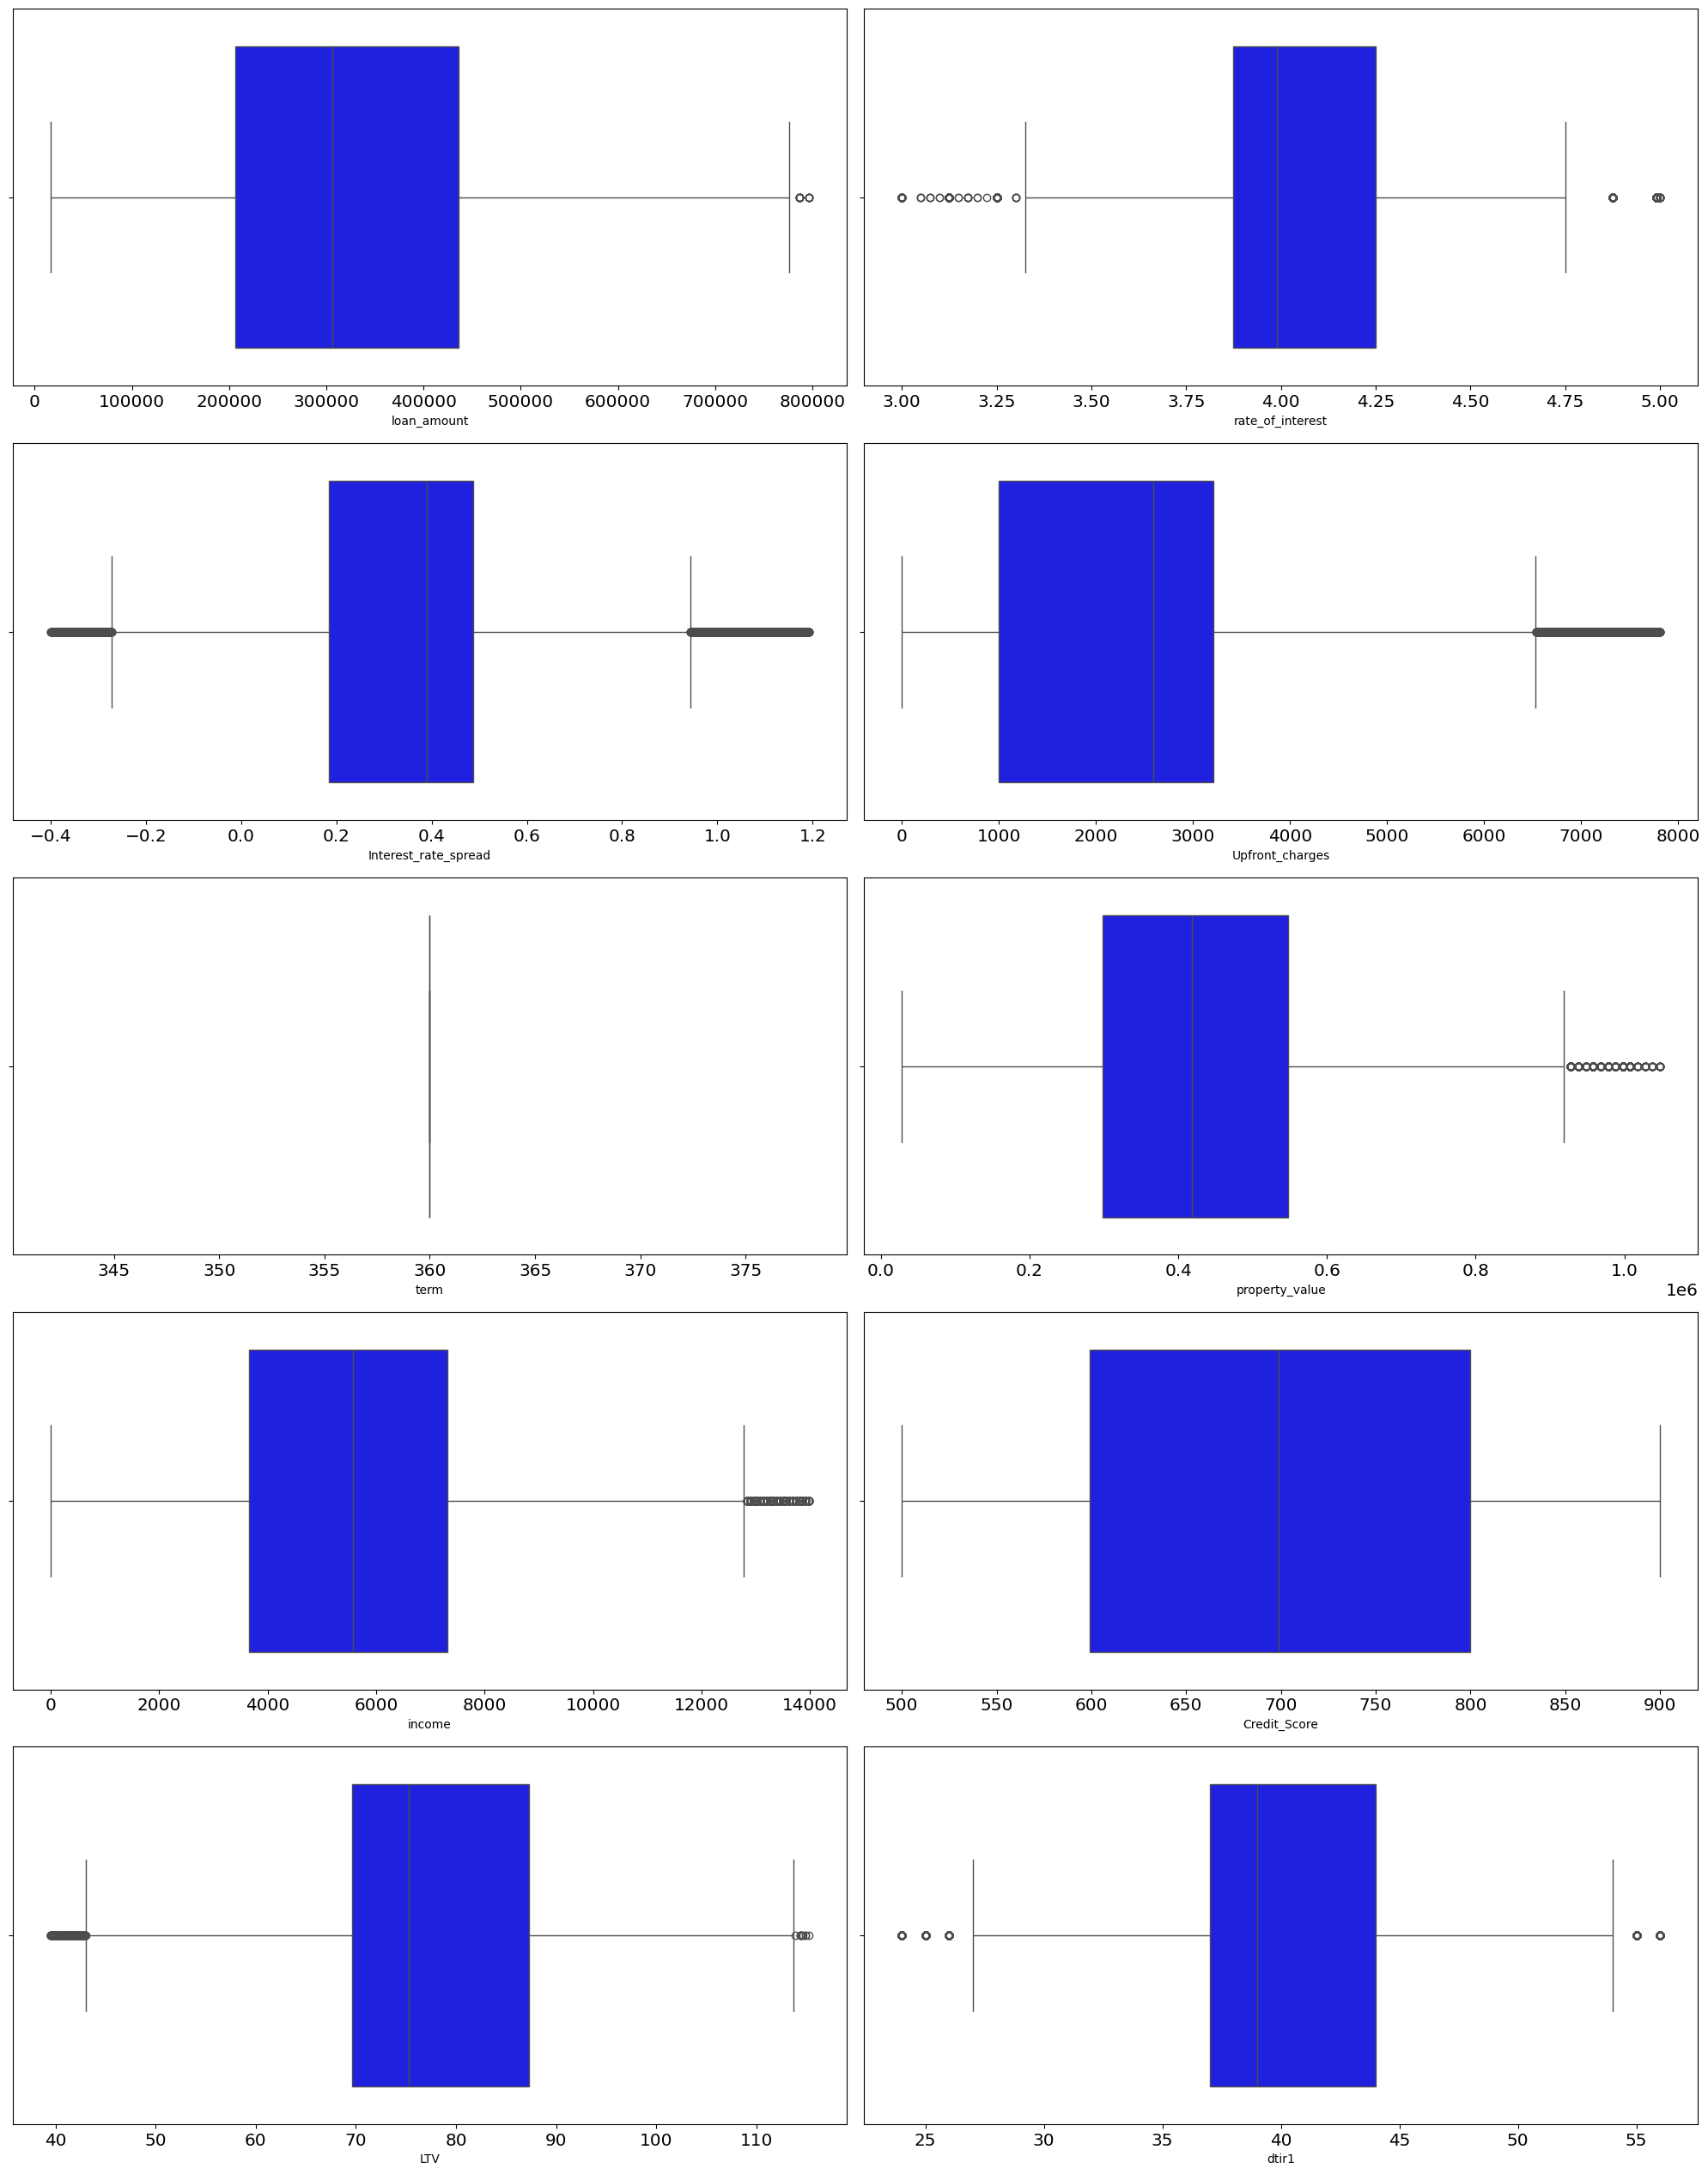

In [54]:
for i in range(0, len(feat_nums)):
    plt.subplot(6, 2, i+1)
    sns.boxplot(x=filtered_df[feat_nums[i]], color='blue', orient='h')
    plt.tight_layout()

## Feature Scaling

In [55]:
X_train = filtered_df.drop(columns = ["Status"])
y_train = filtered_df["Status"]

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

## Feature selection using VIF



In [57]:
X_train_std_df = pd.DataFrame(X_train_std, columns = X_train.columns)
X_test_std_df = pd.DataFrame(X_test_std, columns = X_test.columns)

In [58]:
X_train_std_df.describe()

,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,Secured_by,income,Credit_Score,co-applicant_credit_type,submission_of_application,LTV,Security_Type,dtir1,Gender_Joint,Gender_Male,Gender_Sex Not Available,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,occupancy_type_pr,occupancy_type_sr,total_units_2U,total_units_3U,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,Region_North-East,Region_central,Region_south
count,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,56085.0,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04,5.608500e+04
mean,3.243273e-17,-7.664765e-18,1.393594e-18,5.447684e-18,4.560852e-18,-1.469608e-17,-3.234658e-15,-1.508882e-16,1.266903e-17,0.0,-2.356440e-17,3.775372e-17,1.264370e-16,3.110248e-17,-1.484241e-15,-8.424907e-18,-9.856508e-17,1.619102e-16,-1.304910e-16,-1.677380e-16,1.745793e-16,-1.484241e-15,1.576028e-16,-3.116582e-17,2.027045e-17,-4.484838e-17,-4.560852e-18,-1.266903e-17,-1.596298e-17,1.773665e-18,-2.609821e-17,5.827755e-17,-6.461207e-18,1.596298e-17,1.216227e-17,8.234872e-18,4.206119e-17,2.698504e-17,9.748821e-17,3.496653e-17,5.979784e-17,-5.156297e-17,-9.349747e-17,2.166405e-17,5.523699e-17,4.282133e-17,-4.155443e-17,9.805832e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,0.0,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-2.329570e-01,-4.422237e-01,-1.814138e-01,-2.025488e-02,-2.329034e+00,-2.059155e+00,-2.759277e+00,-2.443981e+00,-1.327129e+00,0.0,-3.127528e+00,-4.607547e+00,-5.908121e+00,-2.096584e+00,-7.139773e+01,-1.400605e-02,-2.070189e+00,-1.719584e+00,-1.003590e+00,-1.206243e+00,-2.732701e+00,-7.139773e+01,-2.445551e+00,-6.088527e-01,-6.449543e-01,-5.568033e-01,-4.293626e-01,-3.370357e-01,-1.118518e-01,-7.263165e-01,-7.615141e-01,-4.413213e+00,-1.300649e-01,-8.871891e-02,-3.659299e-02,-3.133077e-02,-6.319504e-01,-4.060122e-01,-6.059922e-01,-5.532855e-01,-5.255162e-01,-4.904530e-01,-3.966690e-01,-1.047746e-01,-2.220325e-01,-9.339712e-02,-2.514814e-01,-8.455030e-01
25%,-2.329570e-01,-4.422237e-01,-1.814138e-01,-2.025488e-02,4.293626e-01,-8.059615e-01,-4.392106e-01,-5.863062e-01,-7.988327e-01,0.0,3.197414e-01,2.170352e-01,1.692586e-01,-7.105768e-01,1.400605e-02,-1.400605e-02,-7.424101e-01,-8.658276e-01,-1.003590e+00,-1.206243e+00,-5.442400e-01,1.400605e-02,-4.360081e-01,-6.088527e-01,-6.449543e-01,-5.568033e-01,-4.293626e-01,-3.370357e-01,-1.118518e-01,-7.263165e-01,-7.615141e-01,2.265923e-01,-1.300649e-01,-8.871891e-02,-3.659299e-02,-3.133077e-02,-6.319504e-01,-4.060122e-01,-6.059922e-01,-5.532855e-01,-5.255162e-01,-4.904530e-01,-3.966690e-01,-1.047746e-01,-2.220325e-01,-9.339712e-02,-2.514814e-01,-8.455030e-01
50%,-2.329570e-01,-4.422237e-01,-1.814138e-01,-2.025488e-02,4.293626e-01,-1.463861e-01,-1

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(X_train_std_df)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,loan_limit,1.043470
2,approv_in_adv,1.075863
3,Credit_Worthiness,1.042248
4,open_credit,1.027192
5,business_or_commercial,inf
6,loan_amount,6.356821
7,rate_of_interest,1.791661
8,Interest_rate_spread,2.057581
9,Upfront_charges,1.278759
10,term,NaN


In [60]:
corr = pd.concat([X_train_std_df, y_train], axis = 1).corr()
corr

,loan_limit,approv_in_adv,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,Secured_by,income,Credit_Score,co-applicant_credit_type,submission_of_application,LTV,Security_Type,dtir1,Gender_Joint,Gender_Male,Gender_Sex Not Available,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,occupancy_type_pr,occupancy_type_sr,total_units_2U,total_units_3U,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,Region_North-East,Region_central,Region_south,Status
loan_limit,1.000000,0.116878,-0.031695,0.023180,0.015220,0.095585,0.036941,0.003601,0.001095,NaN,0.041941,0.042384,0.028151,0.052619,0.003263,-0.003263,0.046517,0.002822,0.028941,0.007876,0.031338,0.003263,0.013782,0.015118,-0.006574,0.002234,-0.015220,0.064123,0.000239,0.004747,-0.026396,0.010480,-0.004433,-0.004167,-0.004108,0.003013,-0.003559,0.023715,-0.012275,0.008068,0.012980,-0.001999,-0.006239,-0.001829,0.000901,-0.005199,0.000436,0.004992,-0.002892
approv_in_adv,0.116878,1.000000,-0.053878,0.000566,0.006913,-0.040073,0.055908,0.050013,0.027841,NaN,0.076424,0.079001,0.070456,-0.059664,0.006194,-0.006194,-0.014195,-0.000213,-0.016143,0.090733,0.064645,0.006194,0.009060,-0.016287,0.009733,0.005659,-0.006913,-0.002358,-0.013246,-0.043720,-0.089139,-0.006927,0.020120,0.001837,-0.001673,-0.004615,0.001371,-0.019815,0.004996,-0.000133,-0.009281,0.000505,-0.002707,0.013202,-0.015950,0.003992,-0.002788,-0.013232,0.004711
Credit_Worthiness,-0.031695,-0.053878,1.000000,0.091594,0.004525,0.000133,0.118298,0.037736,-0.005075,NaN,0.056956,0.030067,0.030706,-0.005025,0.002541,-0.002541,0.003925,-0.002333,0.002700,0.001631,0.007358,0.002541,0.013584,0.007019,-0.001552,-0.004994,-0.004525,-0.001773,0.006359,0.003386,-0.028838,-0.000814,0.004185,-0.004562,-0.003860,-0.002440,0.004049,-0.008997,0.002754,-0.002596,0.000317,0.000384,-0.002947,0.004502,0.000980,0.004985,-0.000984,-0.006989,0.003066
open_credit,0.023180,0.000566,0.091594,1.000000,0.008697,-0.020100,-0.001529,0.000947,0.000961,NaN,-0.002631,-0.093325,0.003428,0.000074,0.000284,-0.000284,0.006451,0.002368,0.020182,0.016792,-0.005058,0.000284,-0.001208,-0.000437,-0.001463,-0.002990,-0.008697,-0.006827,0.021650,0.022331,-0.015424,0.000504,0.004251,-0.001797,-0.000741,-0.000635,-0.012800,0.047361,-0.012274,-0.009128,-0.004229,-0.001024,0.020229,-0.002122,0.012150,-0.001892,-0.005094,-0.004622,0.000404
business_or_commercial,0.015220,0.006913,0.004525,0.008697,1.000000,0.146796,0.186944,-0.330945,0.110398,NaN,-0.001140,0.003388,0.015502,0.213559,0.011547,-0.011547,0.155764,-0.001312,-0.010068,-0.097394,-0.230209,0.011547,-0.113927,0.017384,0.022200,-0.028115,-1.000000,0.144711,0.006175,-0.032178,-0.000577,-0.097290,0.055845,-0.014986,0.014366,0.013452,0.019651,-0.029710,-0.014557,-0.016591,-0.042256,-0.003637,0.056521,-0.020504,0.042338,-0.011955,-0.049017,0.007207,-0.002717
loan_amount,0.095585,-0.040073,0.000133,-0.020100,0.146796,1.000000,-0.096924,-0.270956,-0.186962,NaN,0.044475,-0.012440,0.005851,0.818041,0.014228,-0.014228,0.617223,0.005411,0.127918,-0.497408,0.099217,0.014228,0.010999,0.201597,0.015355,-0.154226,-0.146796,-0.023501,-0.084676,-0.206189,0.213789,0.062815,-0.059433,0.039371,0.019905,0.022203,0.013235,-0.027128,-0.009799,0.173891,0.046783,-0.097633,-0.173079,-0.042685,-0.118148,-0.006737,-0.007294,0.007343,-0.000955
rate_of_interest,0.036941,0.055908,0.118298,-0.001529,0.186944,-0.096924,1.000000,0.483570,0.001645,NaN,-0.130211,0.076149,0.027245,-0.095882,0.001881,-0.001881,0.000613,-0.001940,-0.039262,0.132004,-0.046209,0.001881,0.010712,-0.033946,-0.012921,0.021094,-0.186944,-0.144075,0.037034,0.148595,-0.223851,-0.119865,0.033161,0.011213,0.008547,0.020095,0.024417,-0.053823,-0.008178,-0.028386,0.002169,0.036217,0.020530,0.001506,0.008281,-0.001835,0.000307,0.00

In [61]:
print(corr.loc["Status", "loan_amount"])
print(corr.loc["Status", "property_value"])

-0.0009550658572569853
-0.0003594988019996651


In [62]:
removed_feats = ["business_or_commercial", "property_value", "term", "construction_type", "Secured_by", "Security_Type", "loan_type_type2"]
X_train_std_df.drop(columns = removed_feats, inplace = True)
X_test_std_df.drop(columns = removed_feats, inplace = True)

In [63]:
print(X_train_std_df.shape)
print(X_test_std_df.shape)

(56085, 41)
(44601, 41)


## Imbalance handling using SMOTE

In [64]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 45)
X_train_sampled, y_train_sampled = sm.fit_resample(X_train_std_df, y_train)

In [65]:
y_train_sampled.value_counts()

1    39601
0    39601
Name: Status, dtype: int64

## Fitting model to cleaned data

In [66]:
def evaluation(model):
    y_pred_train = model.predict(X_train_sampled)
    y_pred_test = model.predict(X_test_std_df)

    recall_train = recall_score(y_train_sampled, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)

    f1_train = f1_score(y_train_sampled, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)

    roc_auc_train = roc_auc_score(y_train_sampled, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)

    print(f"Model: {model}")

    print(f"Recall train: {recall_train}")
    print(f"Recall test: {recall_test}")

    print(f"F1 score train: {f1_train}")
    print(f"F1 score test: {f1_test}")

    print(f"ROC AUC score train: {roc_auc_train}")
    print(f"ROC AUC score test: {roc_auc_test}")

### Baseline logistic regression model

In [67]:
logreg = LogisticRegression()
logreg.fit(X_train_sampled, y_train_sampled)

LogisticRegression()

In [68]:
evaluation(logreg)

Model: LogisticRegression()
Recall train: 0.7255372339082347
Recall test: 0.649729927675547
F1 score train: 0.7911119677299449
F1 score test: 0.6646686958557715
ROC AUC score train: 0.8084265548849777
ROC AUC score test: 0.7753519286219056


In [69]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Baseline k-nearest neighbors model

In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_sampled, y_train_sampled)

KNeighborsClassifier()

In [71]:
evaluation(knn)

Model: KNeighborsClassifier()
Recall train: 0.9856821797429358
Recall test: 0.8490341481278038
F1 score train: 0.927382663546406
F1 score test: 0.7160560552831718
ROC AUC score train: 0.9228176056160199
ROC AUC score test: 0.8398030174097063


In [72]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### Baseline random forest classifier model

In [73]:
rf = RandomForestClassifier()
rf.fit(X_train_sampled, y_train_sampled)

RandomForestClassifier()

In [74]:
evaluation(rf)

Model: RandomForestClassifier()
Recall train: 1.0
Recall test: 1.0
F1 score train: 1.0
F1 score test: 0.9999542271250057
ROC AUC score train: 1.0
ROC AUC score test: 0.9999851535126789


In [75]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Baseline light gradient boosting model

In [76]:
lgbm = LGBMClassifier()
lgbm.fit(X_train_sampled, y_train_sampled)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39601, number of negative: 39601
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6398
[LightGBM] [Info] Number of data points in the train set: 79202, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [77]:
evaluation(lgbm)

Model: LGBMClassifier()
Recall train: 1.0
Recall test: 1.0
F1 score train: 1.0
F1 score test: 0.9999542271250057
ROC AUC score train: 1.0
ROC AUC score test: 0.9999851535126789


In [78]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

## Hyperparameter Tuning

### Logistic Regression

In [79]:
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C' : [0.01, 0.1, 1],
    'solver': ['lbfgs', 'newton-cholesky', 'saga']
}

logreg_clf = LogisticRegression(random_state = 45)

logreg_gridcv = GridSearchCV(logreg_clf, parameters, scoring="recall")
logreg_gridcv.fit(X_train_sampled, y_train_sampled)

GridSearchCV(estimator=LogisticRegression(random_state=45),
             param_grid={'C': [0.01, 0.1, 1],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'newton-cholesky', 'saga']},
             scoring='recall')

In [80]:
cv_result = pd.DataFrame(logreg_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
21,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.725260,1
22,"{'C': 1, 'penalty': 'l2', 'solver': 'newton-ch...",0.725108,2
23,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.725083,3
20,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.725058,4
14,"{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}",0.725058,4
13,"{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-...",0.725032,6
12,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.725032,6
11,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}",0.724047,8
5,"{'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}",0.722255,9
3,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.722229,10


In [81]:
print(f"Best parameters (Logistic Regression): {logreg_gridcv.best_params_}")

Best parameters (Logistic Regression): {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


### Random Forest Classifier

In [82]:
parameters = {
    'n_estimators': (50,100,150,200),
    'max_depth': list(np.arange(10, 31)),
    'criterion': ['gini', 'entropy']
}

rf_clf = RandomForestClassifier(random_state = 45)

rf_randomcv = RandomizedSearchCV(rf_clf, parameters, scoring = "recall")
rf_randomcv.fit(X_train_sampled, y_train_sampled)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=45),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30],
                                        'n_estimators': (50, 100, 150, 200)},
                   scoring='recall')

In [83]:
cv_result = pd.DataFrame(rf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
0,"{'n_estimators': 100, 'max_depth': 29, 'criter...",1.0,1
1,"{'n_estimators': 150, 'max_depth': 26, 'criter...",1.0,1
2,"{'n_estimators': 150, 'max_depth': 14, 'criter...",1.0,1
3,"{'n_estimators': 150, 'max_depth': 19, 'criter...",1.0,1
4,"{'n_estimators': 50, 'max_depth': 21, 'criteri...",1.0,1
5,"{'n_estimators': 100, 'max_depth': 21, 'criter...",1.0,1
6,"{'n_estimators': 150, 'max_depth': 15, 'criter...",1.0,1
7,"{'n_estimators': 200, 'max_depth': 17, 'criter...",1.0,1
8,"{'n_estimators': 150, 'max_depth': 28, 'criter...",1.0,1
9,"{'n_estimators': 150, 'max_depth': 23, 'criter...",1.0,1


In [84]:
print(f"Best parameters (Random Forest): {rf_randomcv.best_params_}")

Best parameters (Random Forest): {'n_estimators': 100, 'max_depth': 29, 'criterion': 'gini'}


### Light gradient boosting model

In [85]:
parameters = {
    'n_estimators': (50,100,150,200),
    'max_depth' : np.arange(5,11),
    'learning_rate' : (0.01, 0.1)
}

lgbm_clf = LGBMClassifier(random_state = 45)

lgbm_randomcv = RandomizedSearchCV(lgbm_clf, parameters, scoring = "recall")
lgbm_randomcv.fit(X_train_sampled, y_train_sampled)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

RandomizedSearchCV(estimator=LGBMClassifier(random_state=45),
                   param_distributions={'learning_rate': (0.01, 0.1),
                                        'max_depth': array([ 5,  6,  7,  8,  9, 10]),
                                        'n_estimators': (50, 100, 150, 200)},
                   scoring='recall')

In [86]:
cv_result = pd.DataFrame(lgbm_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
4,"{'n_estimators': 150, 'max_depth': 9, 'learnin...",1.000000,1
5,"{'n_estimators': 200, 'max_depth': 5, 'learnin...",1.000000,1
6,"{'n_estimators': 200, 'max_depth': 10, 'learni...",1.000000,1
9,"{'n_estimators': 100, 'max_depth': 9, 'learnin...",0.999975,4
0,"{'n_estimators': 50, 'max_depth': 10, 'learnin...",0.999949,5
1,"{'n_estimators': 100, 'max_depth': 6, 'learnin...",0.999949,5
2,"{'n_estimators': 150, 'max_depth': 10, 'learni...",0.999949,5
3,"{'n_estimators': 150, 'max_depth': 5, 'learnin...",0.999949,5
7,"{'n_estimators': 150, 'max_depth': 8, 'learnin...",0.999949,5
8,"{'n_estimators': 200, 'max_depth': 10, 'learni...",0.999949,5


In [87]:
print(f"Best parameters (Light Gradient Boosting): {lgbm_randomcv.best_params_}")

Best parameters (Light Gradient Boosting): {'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.1}


## Selecting the best model

In [88]:
logreg_tuned = logreg_gridcv.best_estimator_
knn
rf_tuned = rf_randomcv.best_estimator_
lgbm_tuned = lgbm_randomcv.best_estimator_

### Evaluating all models

In [96]:
eval_metrics = {
    "Model" : ["Logistic Regression", "Tuned Logistic Regression", "K-nearest neighbors", "Random Forest", "Tuned Random Forest",
               "LGBM", "Tuned LGBM"],
    "Recall (Train)" : [0.726, 0.726, 0.986, 1.0, 1.0, 1.0, 1.0],
    "Recall (Test)" : [0.650, 0.650, 0.849, 1.0, 1.0, 1.0, 1.0],
    "F1 score (Train)" : [0.791, 0.791, 0.927, 1.0, 1.0, 1.0, 1.0],
    "F1 score (Test)" : [0.665, 0.665, 0.716, 0.999, 1.0, 0.999, 1.0],
    "ROC AUC score (Train)" : [0.808, 0.808, 0.923, 1.0, 1.0, 1.0, 1.0],
    "ROC AUC score (Test)" : [0.775, 0.775, 0.840, 0.999, 1.0, 0.999, 1.0]
}

model_df = pd.DataFrame(eval_metrics)
model_df

,Model,Recall (Train),Recall (Test),F1 score (Train),F1 score (Test),ROC AUC score (Train),ROC AUC score (Test)
0,Logistic Regression,0.726,0.650,0.791,0.665,0.808,0.775
1,Tuned Logistic Regression,0.726,0.650,0.791,0.665,0.808,0.775
2,K-nearest neighbors,0.986,0.849,0.927,0.716,0.923,0.840
3,Random Forest,1.000,1.000,1.000,0.999,1.000,0.999
4,Tuned Random Forest,1.000,1.000,1.000,1.000,1.000,1.000
5,LGBM,1.000,1.000,1.000,0.999,1.000,0.999
6,Tuned LGBM,1.000,1.000,1.000,1.000,1.000,1.000


In our loan default predicition problem, we want to maximize recall as we want to minimize false negatives. In our case, false negatives mean that the loan applicant would default on their loans, however, we mistakenly predict them as not defaulting on their loans. <br>

Out of all the applicants who will actually default on their loans, if some of them are misclassified as non-defaulting applicants (False negatives), then that can lead to a huge loss for the bank because the bank would lend loans to defaulting applicants. <br>

This prompts us to select the model with the highest recall. Random forest and LGBM classifiers, however, seem to be overfitting. K-nearest neighbors will be our choice of model as it does not overfit and it stil performs better than logistic regression.

### Feature Importance

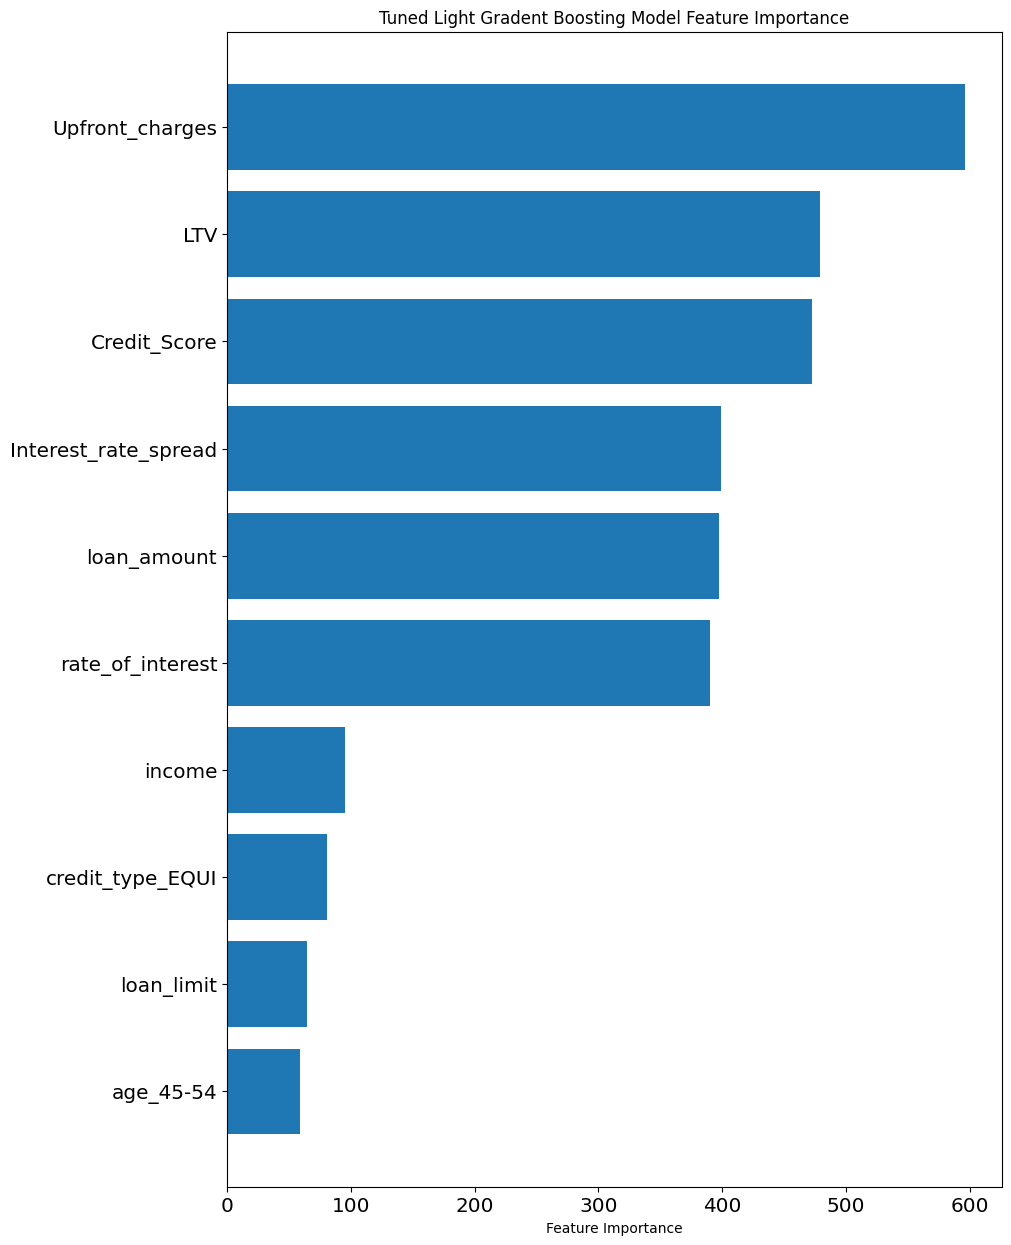

In [98]:
feature_importance_lgbm = lgbm_tuned.feature_importances_
feature_names = X_train_sampled.columns
sorted_index = np.argsort(feature_importance_lgbm)
top_features = sorted_index[-10:]

#plotting
plt.figure(figsize=(10, 15))
plt.barh(range(len(top_features)), feature_importance_lgbm[top_features], align="center")
plt.yticks(range(len(top_features)), feature_names[top_features])
plt.xlabel("Feature Importance")
plt.title("Tuned Light Gradent Boosting Model Feature Importance")
plt.show()